In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import cython
from ripser import ripser, plot_dgms
from scipy.fftpack import fft,ifft
import wfdb
from scipy import signal
from gwpy.spectrogram import Spectrogram

In [3]:

def theStart(aString):
    print(aString)
    theSamp = wfdb.rdsamp('/home/dr-dunstan/Downloads/training2017/' + aString)
    #fields = wfdb.rdrecord('/home/dr-dunstan/Downloads/training2017/A00061')
    #wfdb.plot_wfdb(record=fields, title='Record A00061 from Physionet Challenge 2017')

    theX = []
    for i in range(0,len(theSamp[0])):
    #print(theSamp[0][i][0])
        theX.append(theSamp[0][i][0])


#print(theX)
    values, ybins, xbins, im = plt.specgram(theX,Fs=300)
    print(xbins)
    #plt.xlabel('Time')

    #plt.ylabel('Frequency')

 

    plt.show()
    theGoodList = stepTwo(values,ybins,xbins,im)
    print("good List")
    print(theGoodList)
    longSegment = getLongestSegment(theGoodList)
    print("longest")
    print(longSegment)
    signalVals = getSignalVals(longSegment,theX,xbins)
    #print("Samp")
    #print(signalVals)
    plotSave(signalVals,aString)
    

In [4]:
def stepTwo(values,ybins,xbins,im):
    #print(theVal)
    theVal = values.transpose() 
    minFreq = 0
    maxFreq = 50
    minFreqIndex = ""
    maxFreqIndex = ""
    theThreshold = .0000001

    countMode = 0

    if (minFreq == 0):
        minFreqIndex = 0
        countMode = 1

    for i in range(len(ybins)-1):
        if(ybins[i] < minFreq and ybins[i+1] > minFreq):
            minFreqIndex = i+1
        if(ybins[i] < maxFreq and ybins[i+1] > maxFreq):
            maxFreqIndex = i

#print(minFreqIndex)
#print(maxFreqIndex)

    theList = []
    theList2 = []
    theGoodList = []
    countMode = 0
    badMode = 0

    for i in range(len(theVal)):
        for j in range(len(theVal[i])):
        #if freq is too low 
            if(j < minFreqIndex):
                if(theVal[i][j] > theThreshold):
                #print("Bad freq exsists (Low) at " + str(i))
                    if(countMode == 0):
                        theList.append(i)
                        countMode += 1
            elif(j > maxFreqIndex):
                if(theVal[i][j] > theThreshold):
                #print("Bad freq exsists (High) at " + str(i)
                    badMode += 1
                    if(countMode == 1):
                        theList2.append(i)
                        countMode += 1
                    
        if(badMode == 0):
            theGoodList.append(i)
        else:
            badMode = 0
    
        countMode = 0
        if(minFreq == 0):
            countMode = 1
    #print(len(theList))
    #print(len(theList2))
    return (theGoodList)

In [5]:
maxLen = 0
first = 0 
last = 0
temp = 0

def getLongestSegment(aList):
    maxLen = 0
    first = 0
    if(len(aList) != 0):
        last = aList[0]
        first = aList[0]
    aTemp = []
    aTemp2 = []
    aTemp3 = []
    maxList = []
    finalList = []
    maxIndex = 0
    for i in range(0,len(aList) -1):
        aTemp.append(aList[i+1] - aList[i])
    
    print(aTemp)
    
    for i in range(len(aTemp)):
        if(aTemp[i] != 1):
            aTemp[i] = "NO"
            
            
    
    for i in range(len(aTemp)):
        if(aTemp[i] != 1):
            aTemp3.append(aTemp2)
            aTemp2 = []
        else:
            aTemp2.append(i+1)
            #finTemp.append
    
    print("the temp 3")
    print(aTemp3)
    
    for element in aTemp3:
        if(maxIndex < len(element)):
            maxList = element
            maxIndex = len(element)
    
    for element in maxList:
        finalList.append(aList[element])
    
    #print(maxList)
    if(len(maxList) != 0):
        finalList.insert(0, aList[maxList[0]] - 1)
        
    
    print(finalList)    
    return(finalList)


def getSignalVals(aList,theSamp,timeList):
    theMin = 0
    theMax = 0
    print("indexList")
    print(aList)
    if(len(aList) != 0):
        theMin = int(timeList[aList[0]]) * 300
        theMax = int(timeList[aList[len(aList)-1]]) *300
        if(theMin == theMax):
            theMax = 300 + theMax
    print("theMin")
    print(theMin)
    print("theMax")
    print(theMax)
    #print(theSamp[theMin:theMax+1])
    return(theSamp[theMin:theMax+1])

#theFinal = getLongestSegment(theGoodList)
#theCleaned = getSignalVals(theFinal)
#print(theCleaned)



In [6]:
#nm#wfdb.wrsamp("A00061_clean",fs=300,sig_name=["ECG"],p_signal=theCleaned,units=["mV"],fmt=['16', '16'])

In [ ]:
def plotSave(aList,aString):
    #print(aList)
    x = np.arange(len(aList))
    theCleanedFin = []
    for i in range(0,len(aList)):
        if(len(aList) > 1):
            theCleanedFin.append(aList[i])
        else:
            theCleanedFin.append(aList[i])
        
    y = theCleanedFin

    plt.plot(x,y)
    plt.show()
    z = open(aString +".txt","w")
    for i in range(len(aList)):
        z.write(str(aList[i])+"\n")
    z.close()

A00022
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


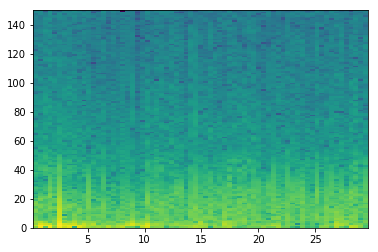

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


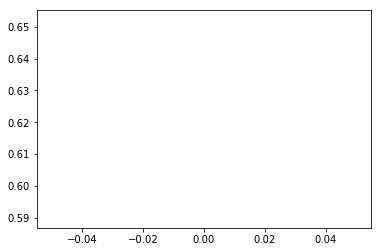

A00034
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


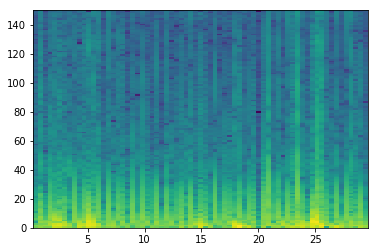

good List
[0, 14, 24, 26, 29, 36, 43, 44, 46, 49, 63, 68]
[14, 10, 2, 3, 7, 7, 1, 2, 3, 14, 5]
the temp 3
[[], [], [], [], [], [], [7], [], [], []]
[43, 44]
longest
[43, 44]
indexList
[43, 44]
theMin
5400
theMax
5700


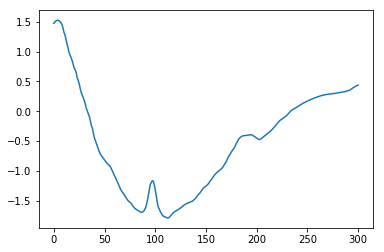

A00056
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


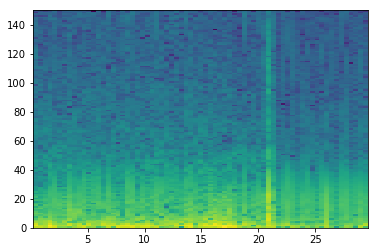

good List
[54, 62]
[8]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


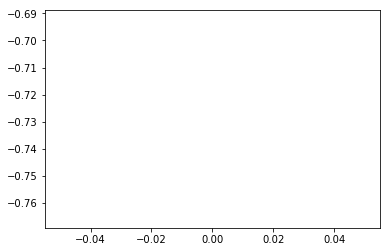

A00106
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333]


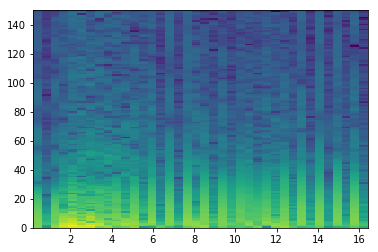

good List
[1, 16, 22, 29, 31, 33, 35, 37]
[15, 6, 7, 2, 2, 2, 2]
the temp 3
[[], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


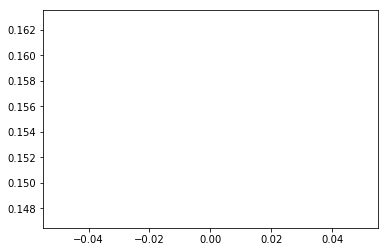

A00125
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


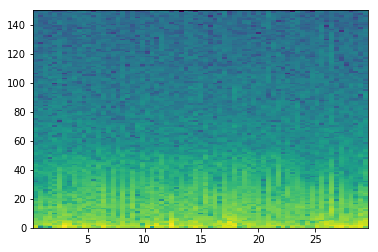

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


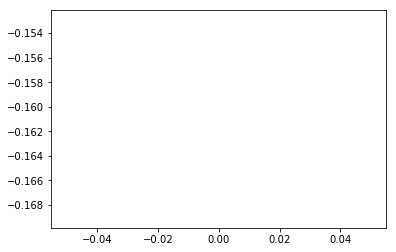

A00139
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667]


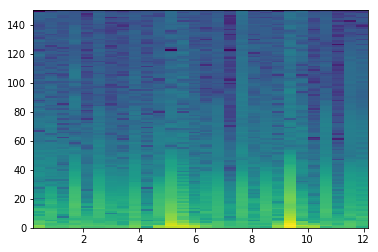

good List
[6, 16, 25]
[10, 9]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


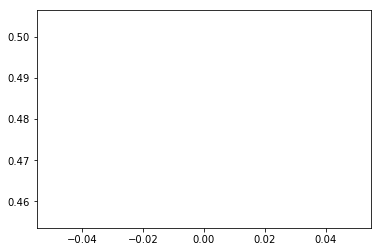

A00164
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

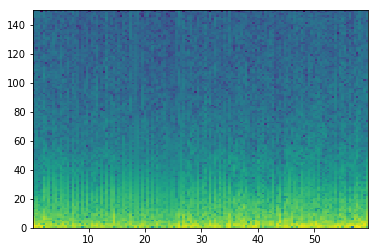

good List
[23, 48, 50, 52, 53, 58, 80, 89, 90, 100, 102, 103, 124]
[25, 2, 2, 1, 5, 22, 9, 1, 10, 2, 1, 21]
the temp 3
[[], [], [], [4], [], [], [8], [], [11]]
[52, 53]
longest
[52, 53]
indexList
[52, 53]
theMin
6600
theMax
6900


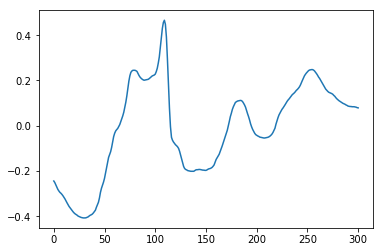

A00196
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


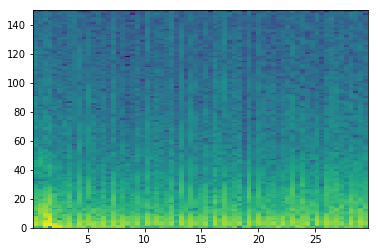

good List
[13, 15, 17, 19, 20, 27, 31, 34, 43, 45, 50, 54, 59]
[2, 2, 2, 1, 7, 4, 3, 9, 2, 5, 4, 5]
the temp 3
[[], [], [], [4], [], [], [], [], [], [], []]
[19, 20]
longest
[19, 20]
indexList
[19, 20]
theMin
2400
theMax
2700


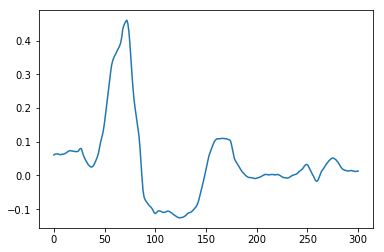

A00201
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


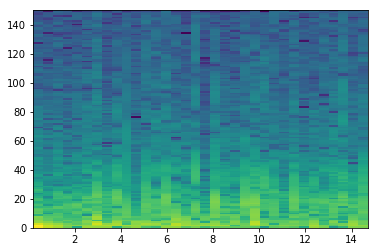

good List
[7, 17, 32]
[10, 15]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


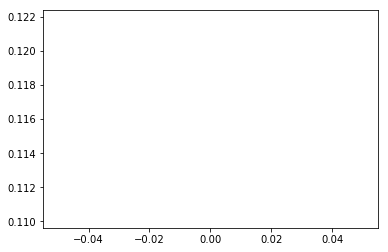

A00205
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


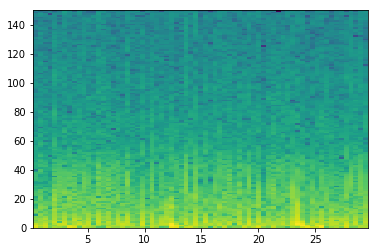

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


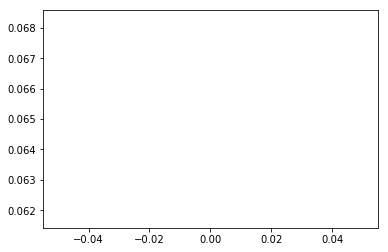

A00307
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333]


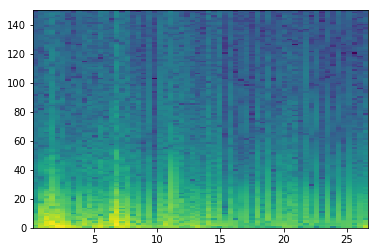

good List
[20, 22, 35, 37, 38, 40, 49, 53, 55, 57]
[2, 13, 2, 1, 2, 9, 4, 2, 2]
the temp 3
[[], [], [], [4], [], [], [], []]
[37, 38]
longest
[37, 38]
indexList
[37, 38]
theMin
4800
theMax
5100


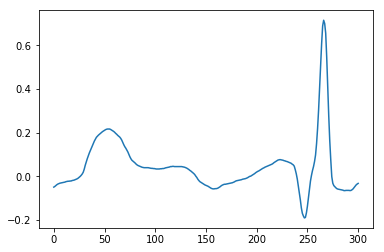

A00370
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


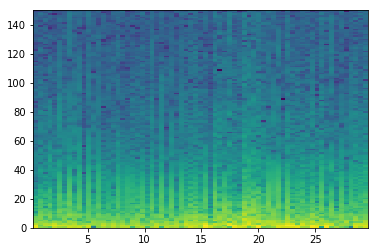

good List
[10, 12, 14, 16, 19, 23, 25, 27, 29, 36, 51, 62]
[2, 2, 2, 3, 4, 2, 2, 2, 7, 15, 11]
the temp 3
[[], [], [], [], [], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


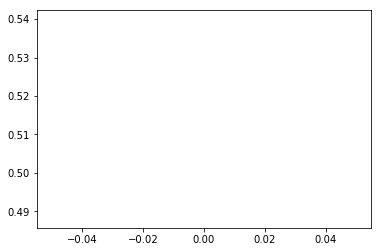

A00445
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24      ]


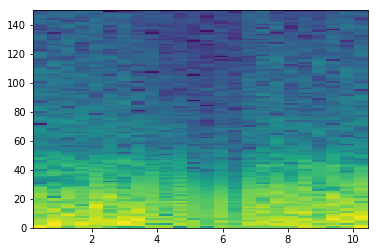

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


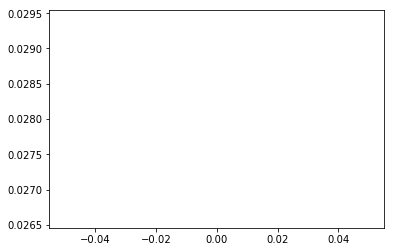

A00474
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667]


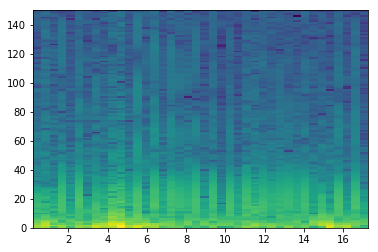

good List
[20, 22, 24, 30, 37, 39]
[2, 2, 6, 7, 2]
the temp 3
[[], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


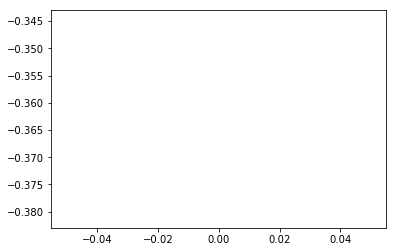

A00524
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


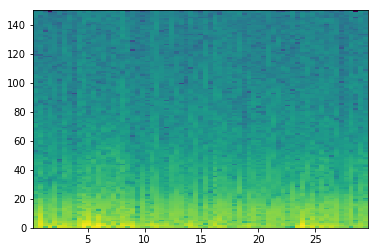

good List
[5, 31]
[26]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


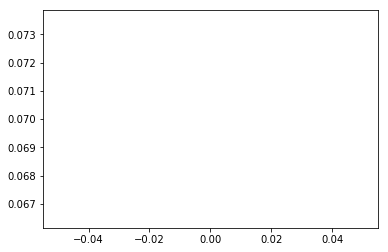

A00537
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


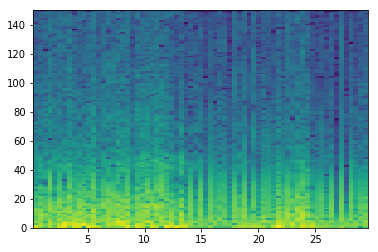

good List
[35, 40, 44, 46, 57, 62, 64]
[5, 4, 2, 11, 5, 2]
the temp 3
[[], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


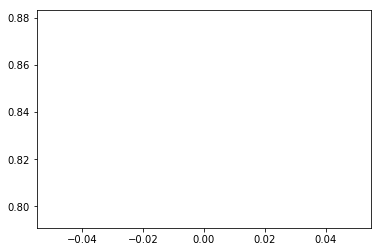

A00585
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667]


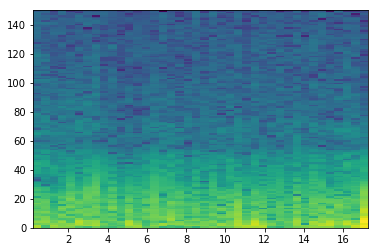

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


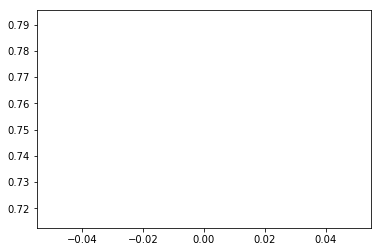

A00591
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333]


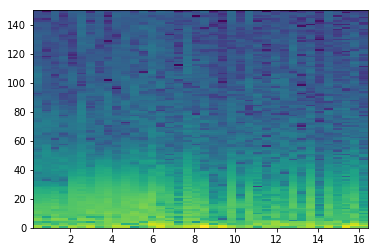

good List
[7]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


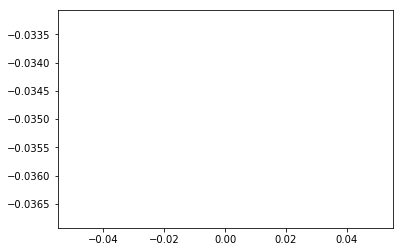

A00619
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333]


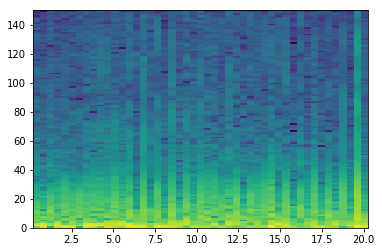

good List
[6, 14, 42, 44]
[8, 28, 2]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


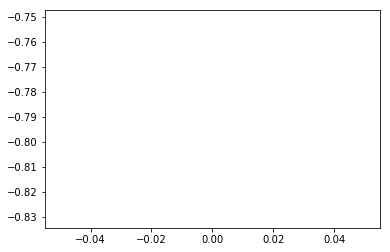

A00629
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333]


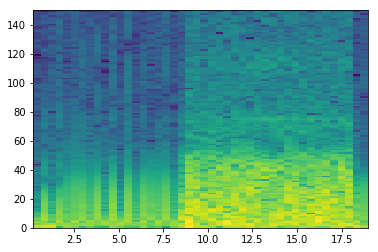

good List
[0, 2, 9, 11, 13, 18, 43]
[2, 7, 2, 2, 5, 25]
the temp 3
[[], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


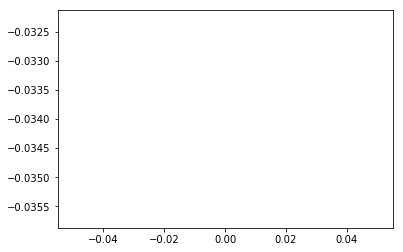

A00660
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667]


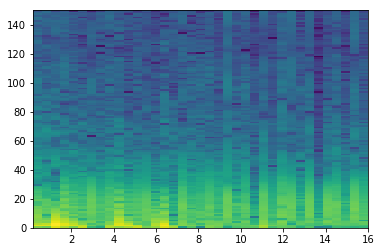

good List
[26, 31]
[5]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


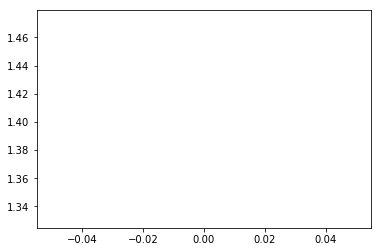

A00690
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


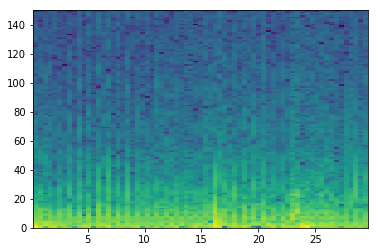

good List
[3, 4, 6, 8, 10, 12, 14, 16, 17, 18, 20, 22, 23, 24, 30, 33, 41, 42, 50, 51, 62, 63]
[1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 6, 3, 8, 1, 8, 1, 11, 1]
the temp 3
[[1], [], [], [], [], [], [8, 9], [], [12, 13], [], [], [17], [19]]
[16, 17, 18]
longest
[16, 17, 18]
indexList
[16, 17, 18]
theMin
2100
theMax
2400


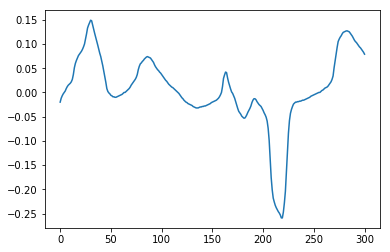

A00700
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2       ]


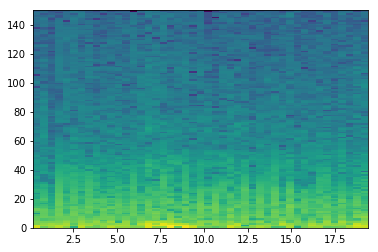

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


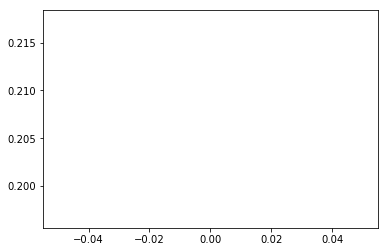

A00705
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


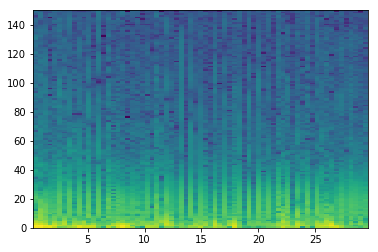

good List
[18, 19, 21, 29, 31, 36, 37, 38, 43, 45, 47, 49, 57, 62, 63, 64]
[1, 2, 8, 2, 5, 1, 1, 5, 2, 2, 2, 8, 5, 1, 1]
the temp 3
[[1], [], [], [], [6, 7], [], [], [], [], []]
[36, 37, 38]
longest
[36, 37, 38]
indexList
[36, 37, 38]
theMin
4500
theMax
4800


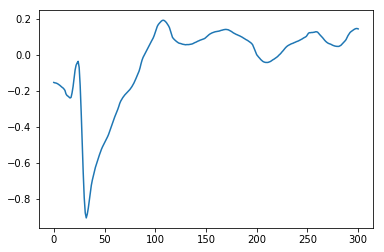

A00761
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


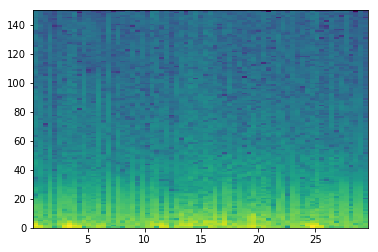

good List
[2, 4, 16, 28, 65, 68]
[2, 12, 12, 37, 3]
the temp 3
[[], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


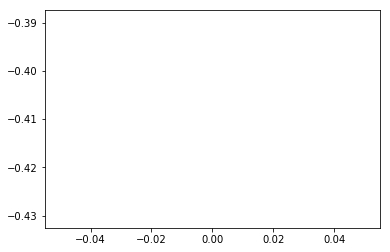

A00774
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


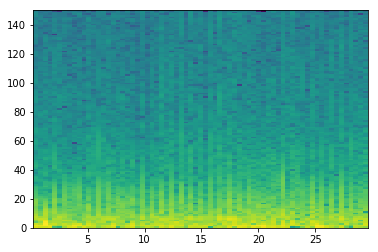

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


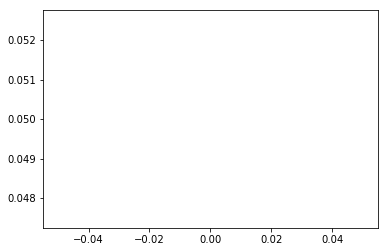

A00813
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


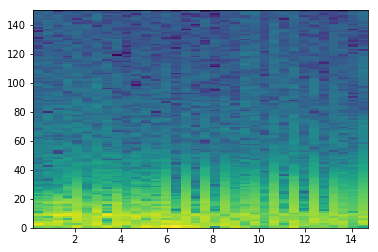

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


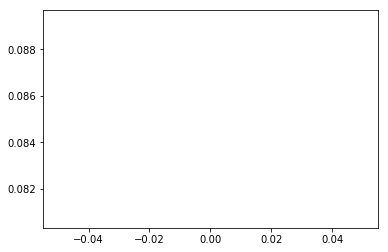

A00984
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333]


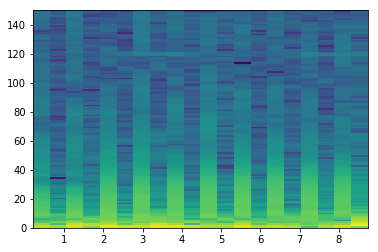

good List
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
the temp 3
[[], [], [], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


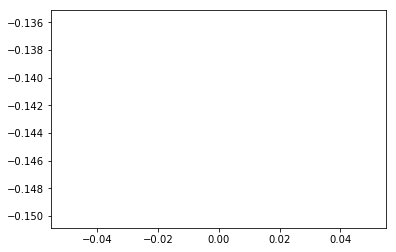

A00988
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


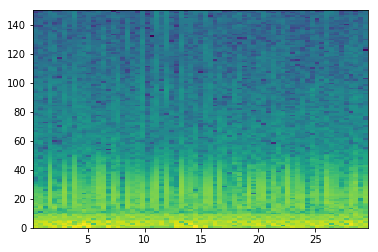

good List
[2, 23, 34]
[21, 11]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


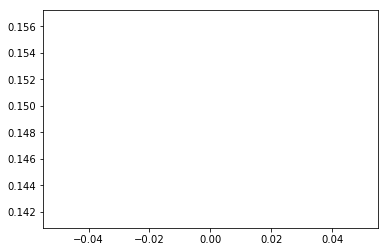

A01006
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667]


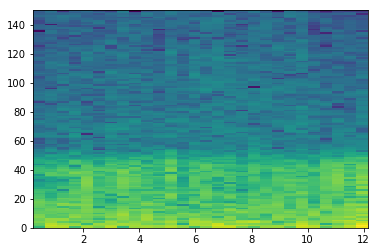

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


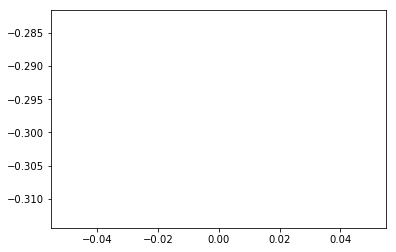

A01048
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667]


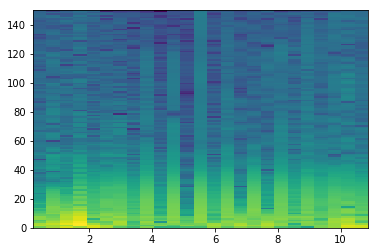

good List
[11, 15]
[4]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


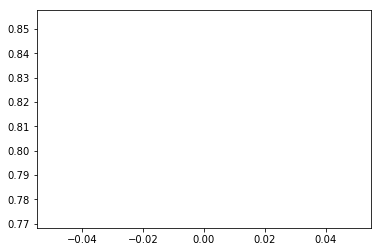

A01063
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32      ]


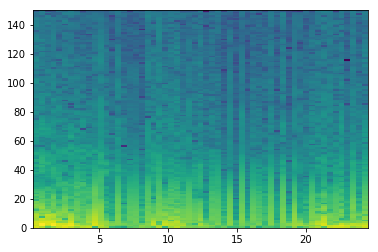

good List
[16, 18, 32, 34, 36, 41, 43]
[2, 14, 2, 2, 5, 2]
the temp 3
[[], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


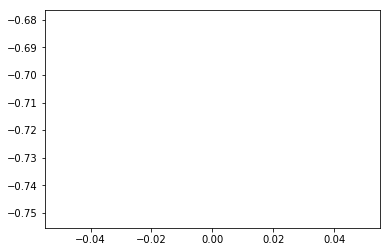

A01070
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333]


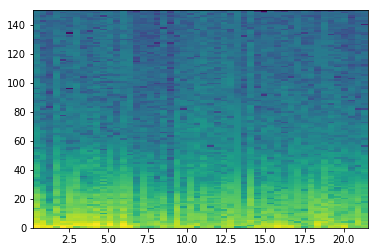

good List
[2, 18, 20]
[16, 2]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


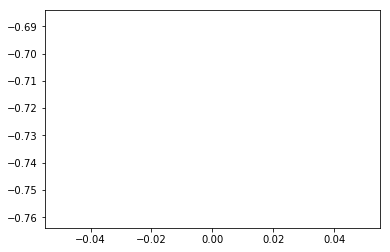

A01116
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


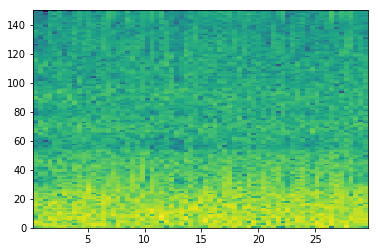

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


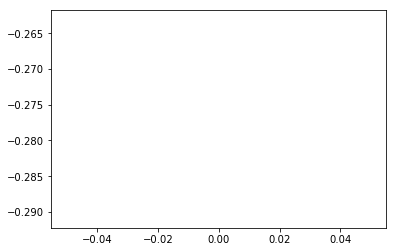

A01160
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333]


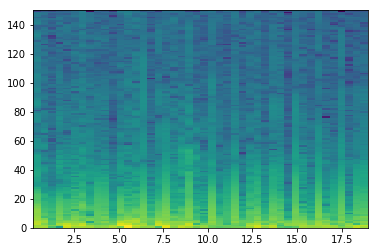

good List
[2, 8, 10, 15, 22, 24, 25, 27, 30, 33, 36, 38, 39, 41, 42, 43]
[6, 2, 5, 7, 2, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1]
the temp 3
[[], [], [], [], [], [6], [], [], [], [], [12]]
[24, 25]
longest
[24, 25]
indexList
[24, 25]
theMin
3000
theMax
3300


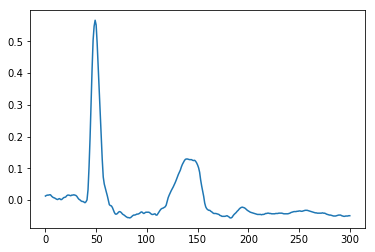

A01169
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667]


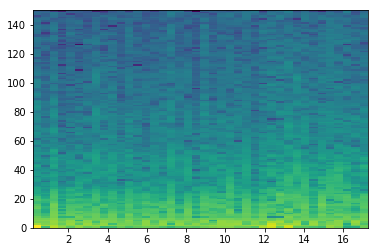

good List
[3, 14, 26]
[11, 12]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


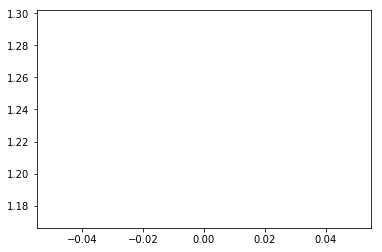

A01246
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


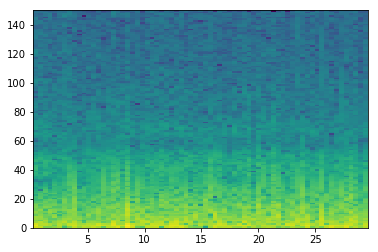

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


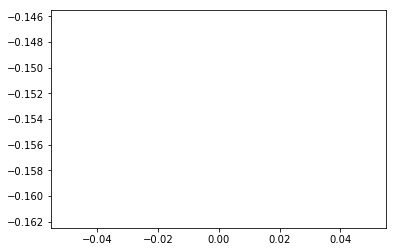

A01253
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333  8.96
  9.38666667  9.81333333]


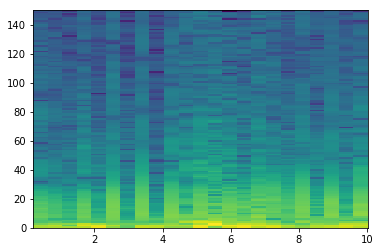

good List
[1, 2, 8]
[1, 6]
the temp 3
[[1]]
[1, 2]
longest
[1, 2]
indexList
[1, 2]
theMin
0
theMax
300


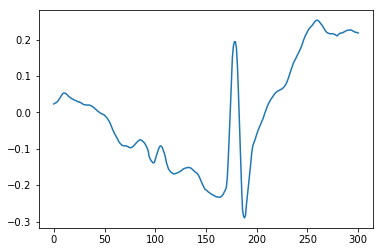

A01270
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667]


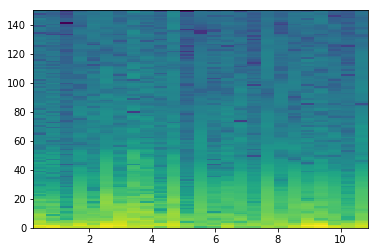

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


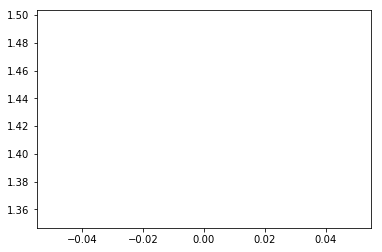

A01275
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2       ]


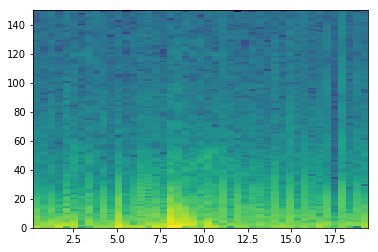

good List
[3, 10, 12, 40]
[7, 2, 28]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


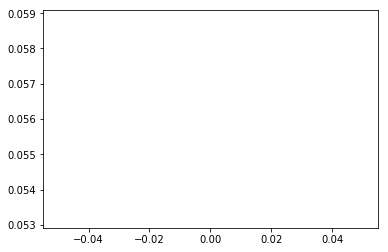

A01299
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


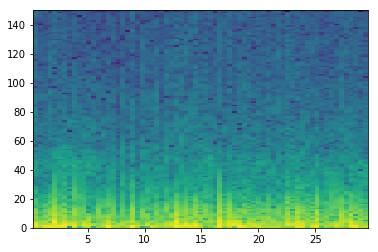

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


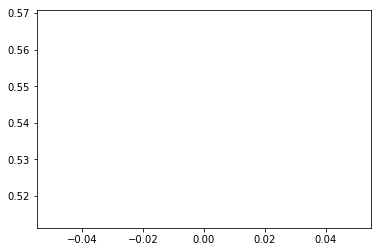

A01427
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


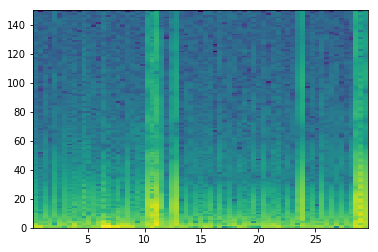

good List
[0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 18, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 48, 51, 52, 53, 56, 58, 60, 61, 62, 63, 64]
[1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 9, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 3, 2, 2, 1, 1, 1, 1]
the temp 3
[[1, 2, 3], [5, 6, 7, 8], [10], [12, 13, 14], [], [17, 18, 19, 20, 21, 22, 23], [25, 26, 27, 28, 29], [], [], [33, 34], [], []]
[30, 31, 32, 33, 34, 35, 36, 37]
longest
[30, 31, 32, 33, 34, 35, 36, 37]
indexList
[30, 31, 32, 33, 34, 35, 36, 37]
theMin
3900
theMax
4800


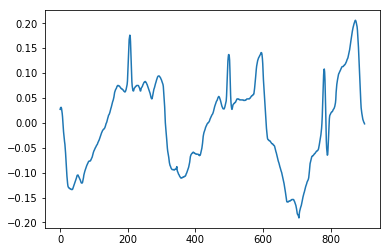

A01429
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333  8.96
  9.38666667  9.81333333]


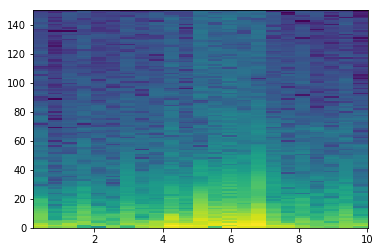

good List
[1, 4]
[3]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


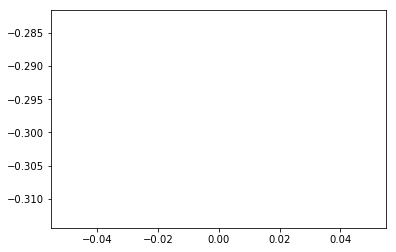

A01502
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667]


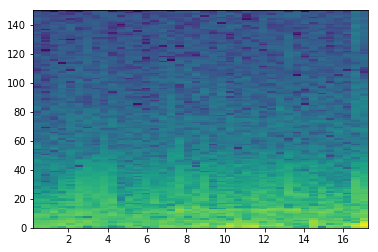

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


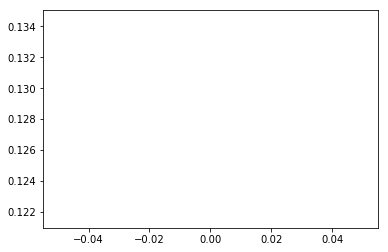

A01521
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333]


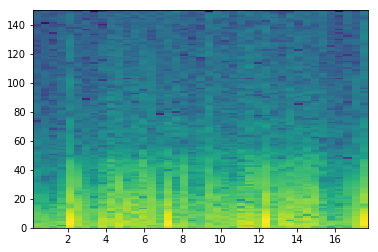

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


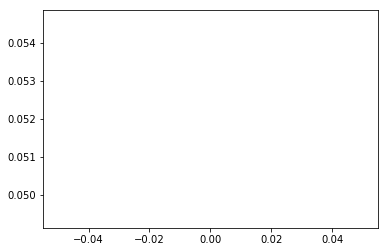

A01529
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333]


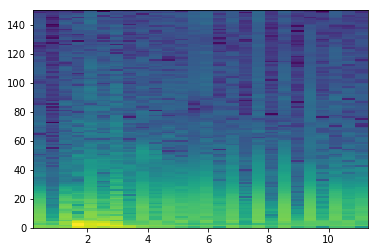

good List
[1, 16, 18, 20]
[15, 2, 2]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


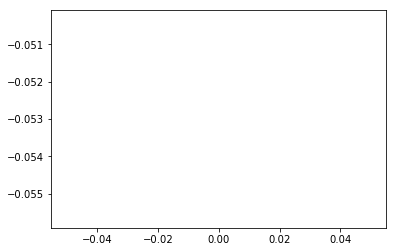

A01567
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


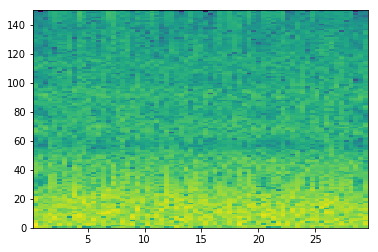

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


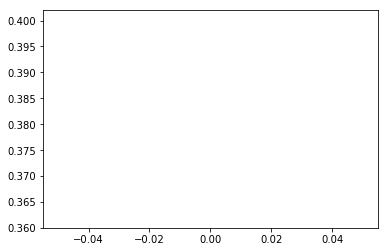

A01578
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


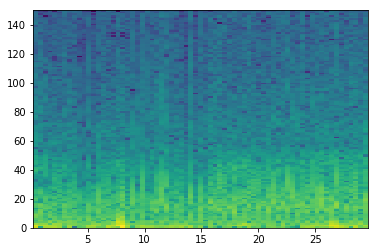

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


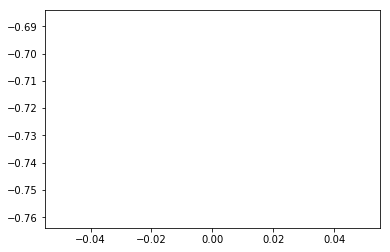

A01585
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


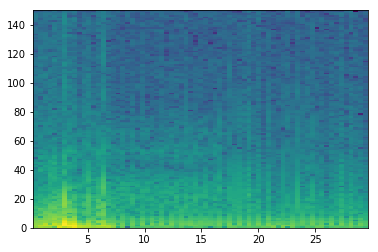

good List
[39, 40, 41, 43, 45, 47, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 66, 67, 68]
[1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1]
the temp 3
[[1, 2], [], [], [], [7], [9, 10, 11, 12], [14, 15, 16, 17], []]
[52, 53, 54, 55, 56]
longest
[52, 53, 54, 55, 56]
indexList
[52, 53, 54, 55, 56]
theMin
6600
theMax
7200


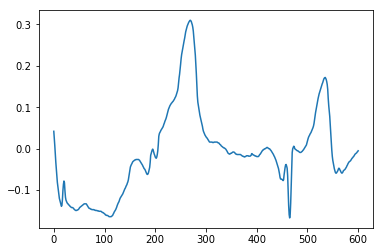

A01703
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


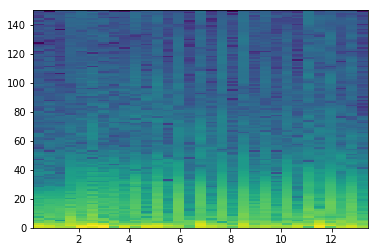

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


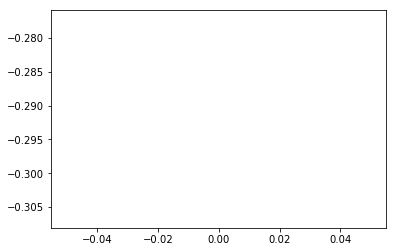

A01706
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24      ]


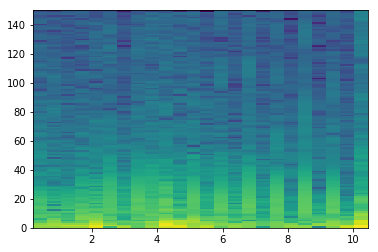

good List
[16, 20, 22]
[4, 2]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


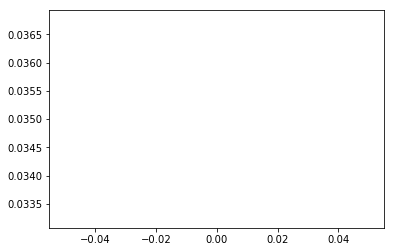

A01707
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

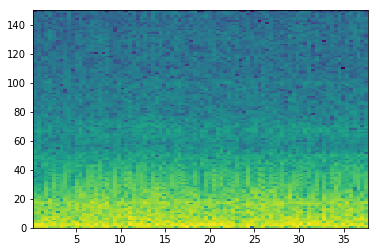

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


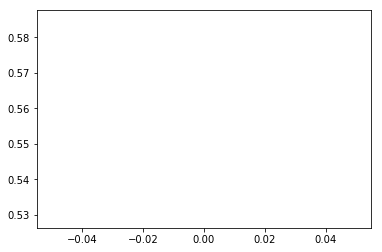

A01727
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


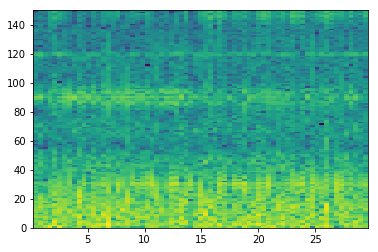

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


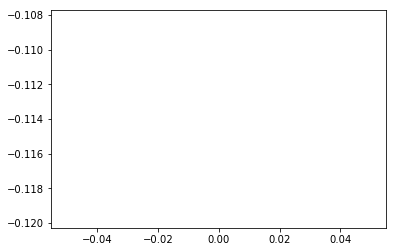

A01750
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333]


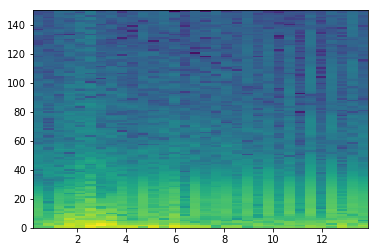

good List
[23, 25, 27, 29]
[2, 2, 2]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


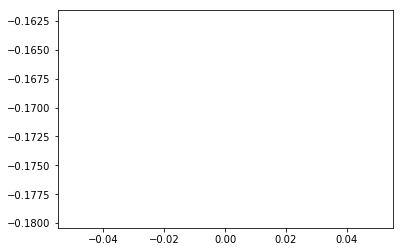

A01755
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333]


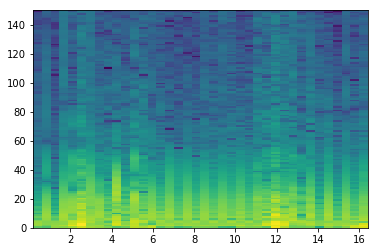

good List
[2]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


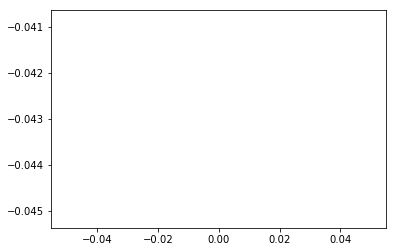

A01763
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

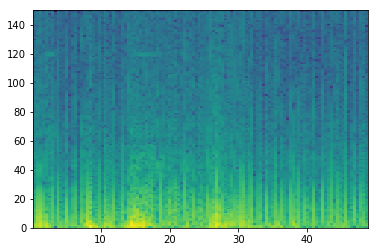

good List
[9, 10, 12, 15, 23, 28, 75, 78, 83, 85, 91, 94, 96, 97, 107, 110, 113]
[1, 2, 3, 8, 5, 47, 3, 5, 2, 6, 3, 2, 1, 10, 3, 3]
the temp 3
[[1], [], [], [], [], [], [], [], [], [], [], [13], [], []]
[9, 10]
longest
[9, 10]
indexList
[9, 10]
theMin
1200
theMax
1500


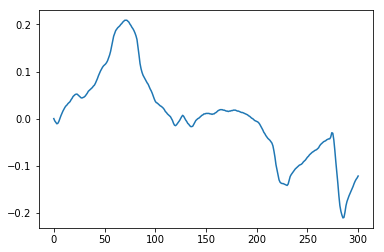

A01772
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333]


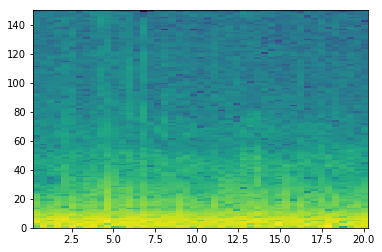

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


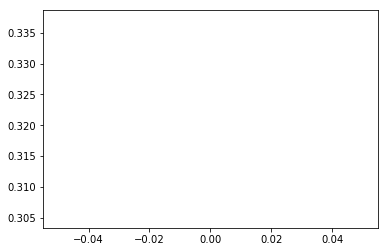

A01805
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


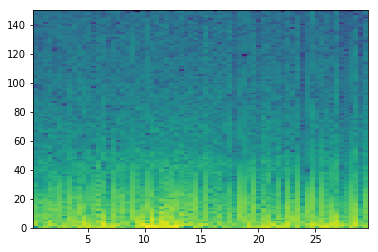

good List
[55]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


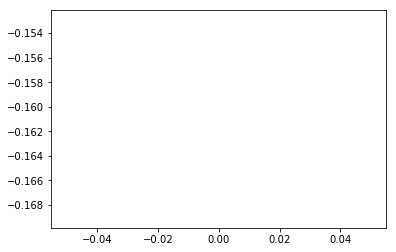

A01833
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


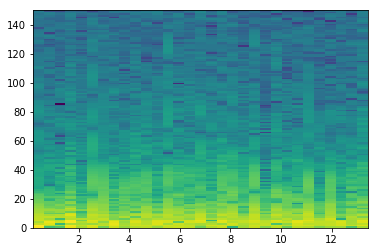

good List
[0, 1, 2, 6, 7, 8, 14, 21, 23, 24, 25, 26, 27, 28, 29]
[1, 1, 4, 1, 1, 6, 7, 2, 1, 1, 1, 1, 1, 1]
the temp 3
[[1, 2], [4, 5], [], []]
[0, 1, 2]
longest
[0, 1, 2]
indexList
[0, 1, 2]
theMin
0
theMax
300


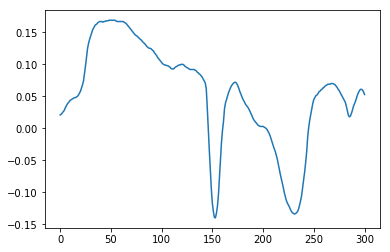

A01888
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


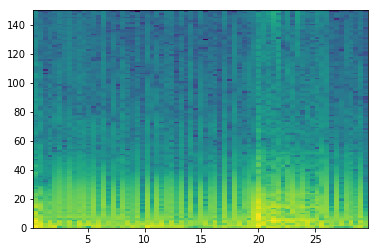

good List
[2, 4, 6, 15, 17, 22, 24, 26, 29, 31, 35, 36, 38, 40, 43, 61, 63, 68]
[2, 2, 9, 2, 5, 2, 2, 3, 2, 4, 1, 2, 2, 3, 18, 2, 5]
the temp 3
[[], [], [], [], [], [], [], [], [], [], [11], [], [], [], [], []]
[35, 36]
longest
[35, 36]
indexList
[35, 36]
theMin
4500
theMax
4800


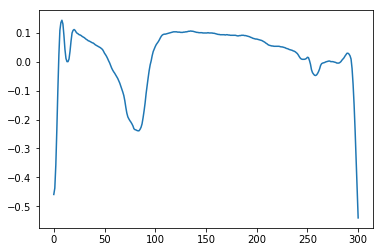

A01917
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


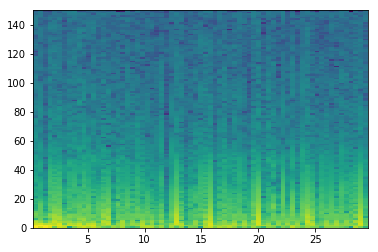

good List
[2, 6, 16, 19, 20, 24, 25, 27, 31, 37, 44, 47, 50, 54, 58, 61, 62]
[4, 10, 3, 1, 4, 1, 2, 4, 6, 7, 3, 3, 4, 4, 3, 1]
the temp 3
[[], [], [], [4], [6], [], [], [], [], [], [], [], []]
[19, 20]
longest
[19, 20]
indexList
[19, 20]
theMin
2400
theMax
2700


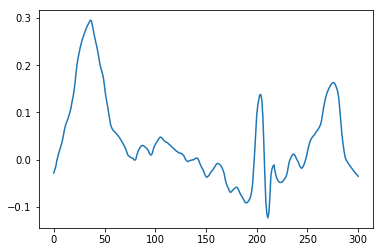

A01938
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


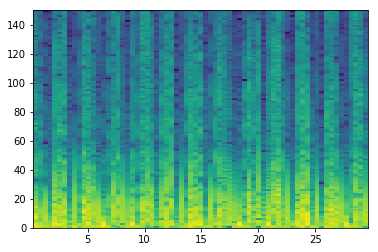

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


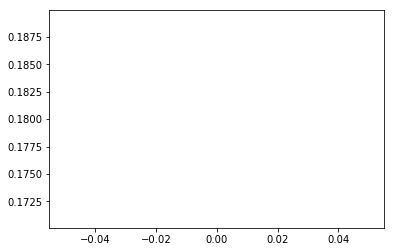

A01965
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


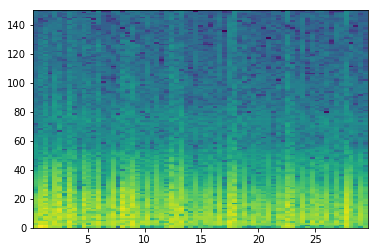

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


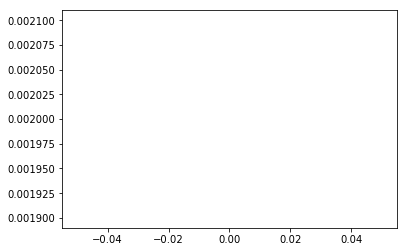

A01966
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24      ]


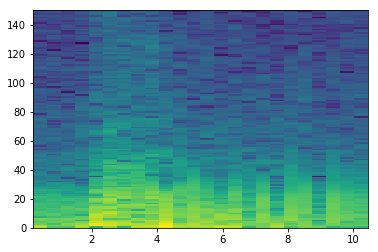

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


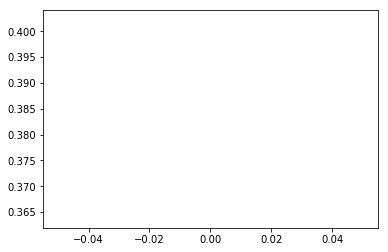

A02014
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667]


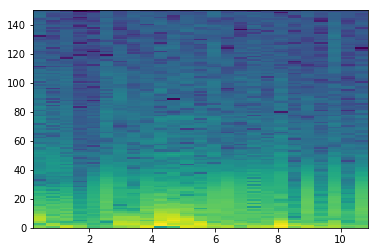

good List
[3, 4, 14, 20, 21]
[1, 10, 6, 1]
the temp 3
[[1], []]
[3, 4]
longest
[3, 4]
indexList
[3, 4]
theMin
300
theMax
600


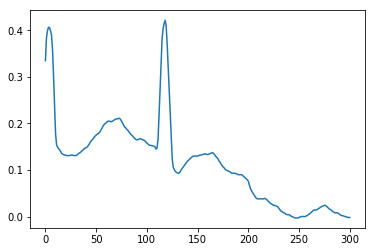

A02032
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52      ]


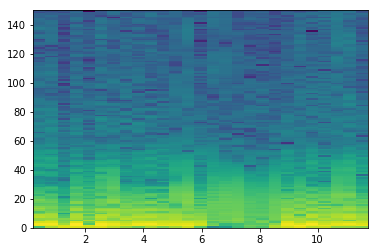

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


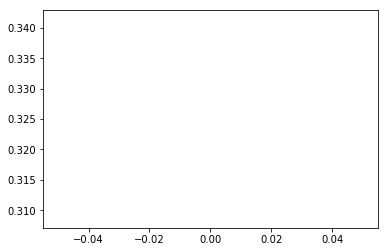

A02055
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


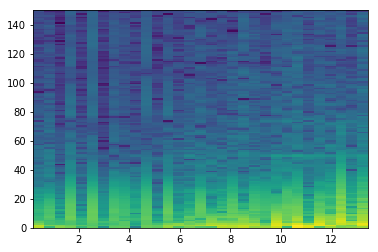

good List
[2, 4, 6, 8, 9, 11]
[2, 2, 2, 1, 2]
the temp 3
[[], [], [], [4]]
[8, 9]
longest
[8, 9]
indexList
[8, 9]
theMin
900
theMax
1200


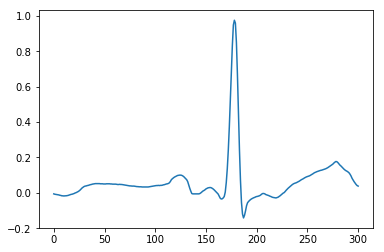

A02069
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667]


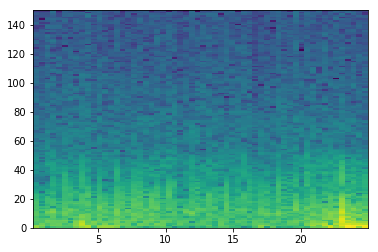

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


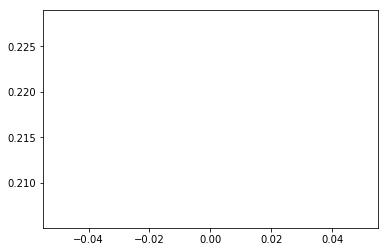

A02113
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

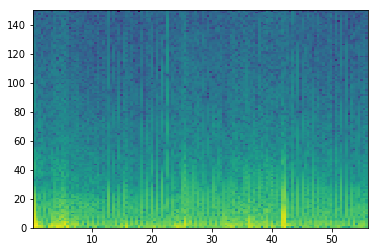

good List
[30, 32, 34, 37, 41, 43, 47, 49, 117, 121, 123, 128]
[2, 2, 3, 4, 2, 4, 2, 68, 4, 2, 5]
the temp 3
[[], [], [], [], [], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


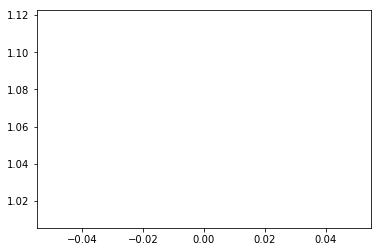

A02133
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333]


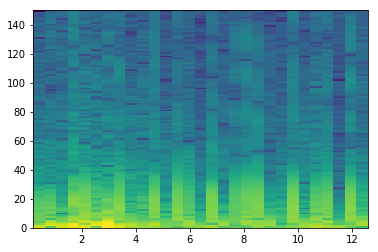

good List
[11, 14, 17, 20, 21, 26, 28]
[3, 3, 3, 1, 5, 2]
the temp 3
[[], [], [], [4], []]
[20, 21]
longest
[20, 21]
indexList
[20, 21]
theMin
2400
theMax
2700


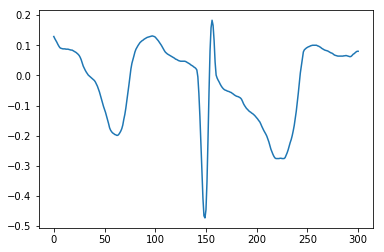

A02168
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333]


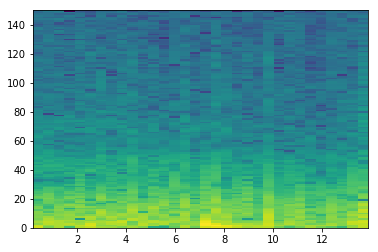

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


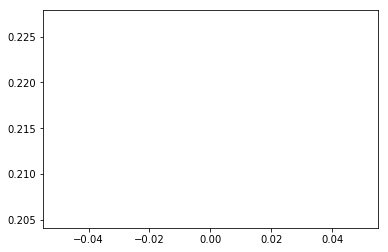

A02181
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


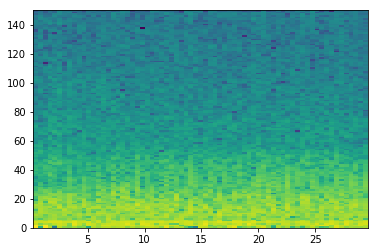

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


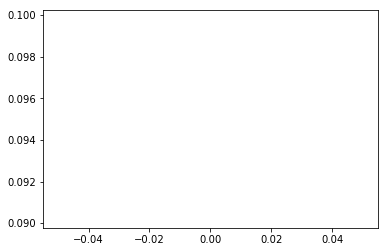

A02196
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333]


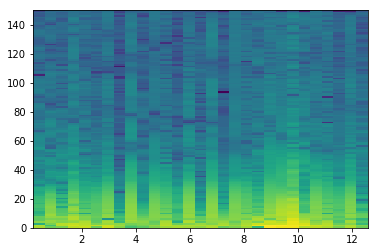

good List
[5, 7, 9, 12, 14, 16, 17, 18, 26]
[2, 2, 3, 2, 2, 1, 1, 8]
the temp 3
[[], [], [], [], [], [6, 7]]
[16, 17, 18]
longest
[16, 17, 18]
indexList
[16, 17, 18]
theMin
2100
theMax
2400


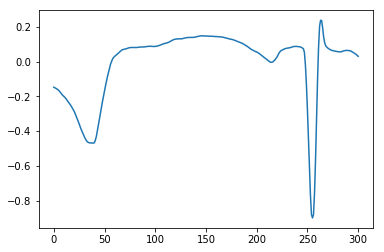

A02217
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333]


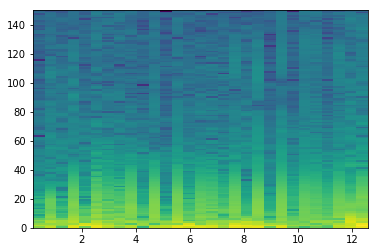

good List
[0, 20]
[20]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


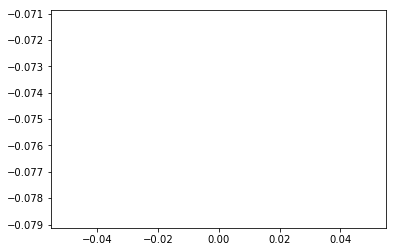

A02252
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333]


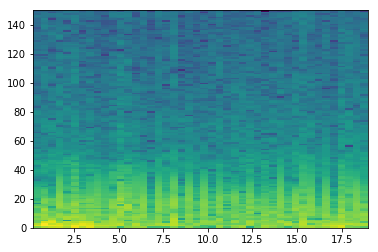

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


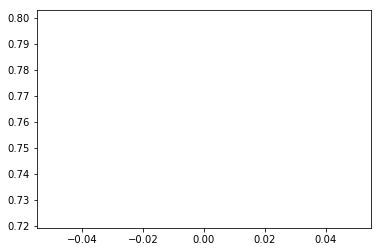

A02364
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

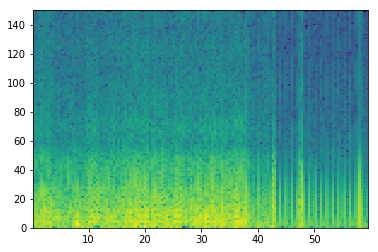

good List
[101, 103, 106, 108, 112, 113, 116, 118, 123, 125, 128, 130, 132, 133, 137, 138]
[2, 3, 2, 4, 1, 3, 2, 5, 2, 3, 2, 2, 1, 4, 1]
the temp 3
[[], [], [], [], [5], [], [], [], [], [], [], [13]]
[112, 113]
longest
[112, 113]
indexList
[112, 113]
theMin
14400
theMax
14700


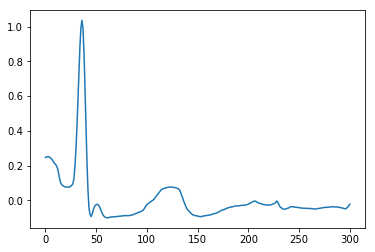

A02372
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333]


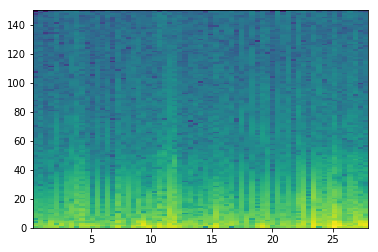

good List
[5, 11, 13, 15, 29, 39, 41, 50]
[6, 2, 2, 14, 10, 2, 9]
the temp 3
[[], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


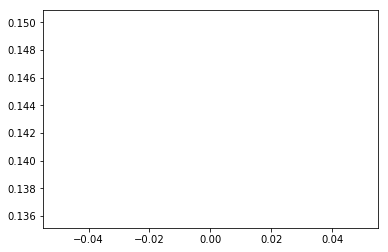

A02411
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


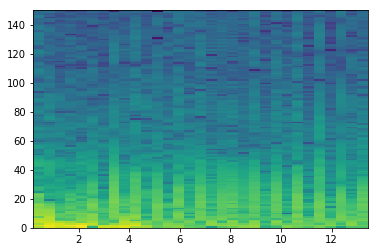

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


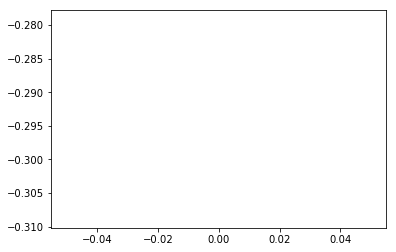

A02419
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52      ]


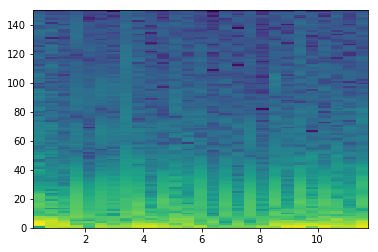

good List
[4, 6, 9, 13, 14, 15, 18]
[2, 3, 4, 1, 1, 3]
the temp 3
[[], [], [], [4, 5]]
[13, 14, 15]
longest
[13, 14, 15]
indexList
[13, 14, 15]
theMin
1500
theMax
1800


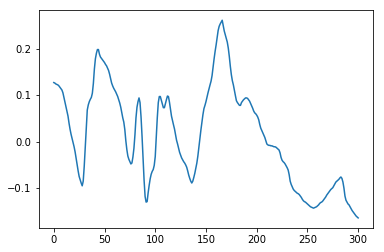

A02479
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


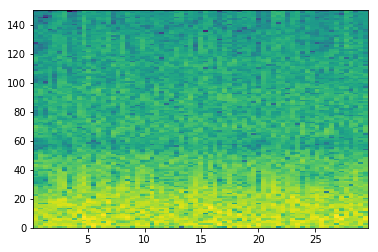

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


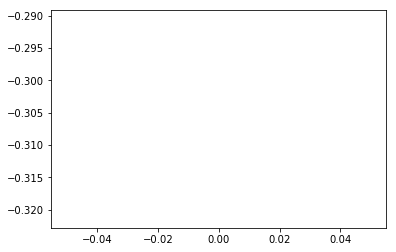

A02514
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


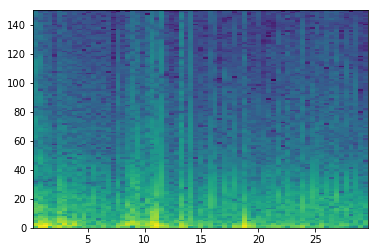

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


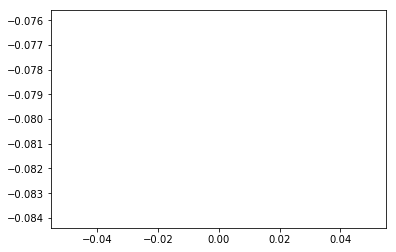

A02575
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


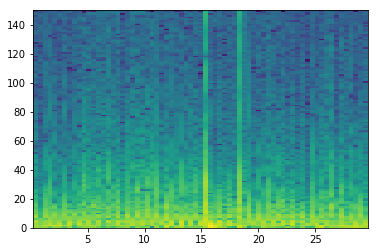

good List
[0, 1, 3, 5, 6, 7, 9, 16, 18, 26, 31, 34, 37, 38, 39, 40, 41, 45, 47, 52, 54, 55, 56, 58, 62, 64, 66, 68]
[1, 2, 2, 1, 1, 2, 7, 2, 8, 5, 3, 3, 1, 1, 1, 1, 4, 2, 5, 2, 1, 1, 2, 4, 2, 2, 2]
the temp 3
[[1], [], [4, 5], [], [], [], [], [], [], [13, 14, 15, 16], [], [], [], [21, 22], [], [], [], []]
[37, 38, 39, 40, 41]
longest
[37, 38, 39, 40, 41]
indexList
[37, 38, 39, 40, 41]
theMin
4800
theMax
5100


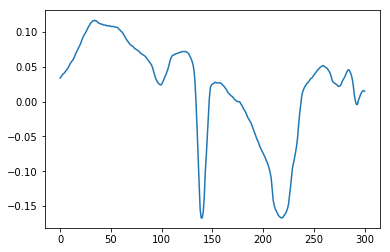

A02607
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


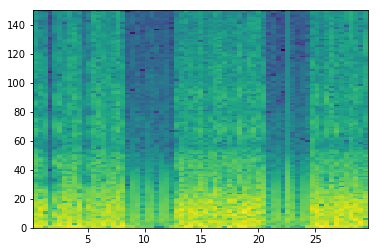

good List
[28]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


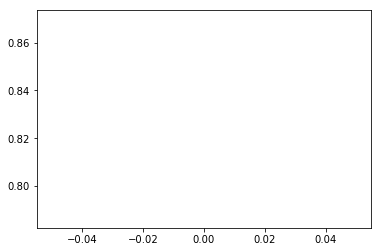

A02614
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


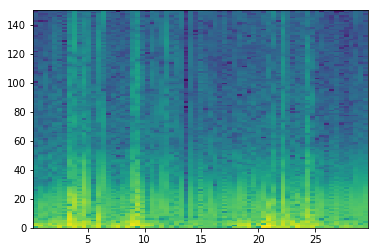

good List
[31]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


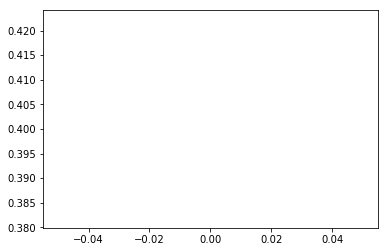

A02693
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


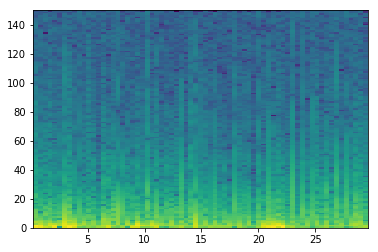

good List
[5, 6, 8, 9, 10, 12, 13, 16, 17, 19, 20, 22, 24, 26, 27, 28, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 49, 51, 52, 54, 56, 57, 59, 61, 63, 65, 68]
[1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3]
the temp 3
[[1], [3, 4], [6], [8], [10], [], [], [14, 15], [], [18, 19, 20, 21, 22, 23, 24], [26, 27, 28, 29, 30], [], [33], [], [36], [], [], [], []]
[33, 34, 35, 36, 37, 38, 39, 40]
longest
[33, 34, 35, 36, 37, 38, 39, 40]
indexList
[33, 34, 35, 36, 37, 38, 39, 40]
theMin
4200
theMax
5100


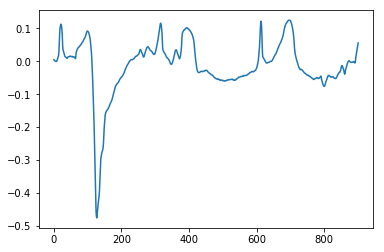

A02702
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

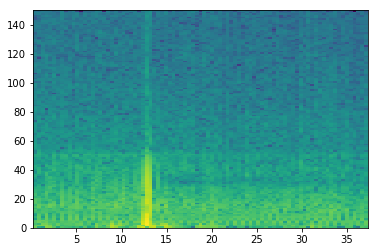

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


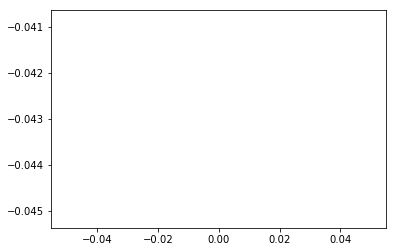

A02706
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


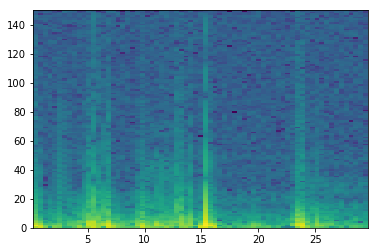

good List
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
the temp 3
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
longest
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
indexList
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
theMin
1500
theMax
4200


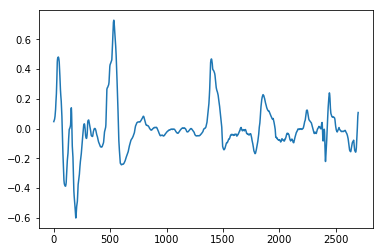

A02717
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36      ]


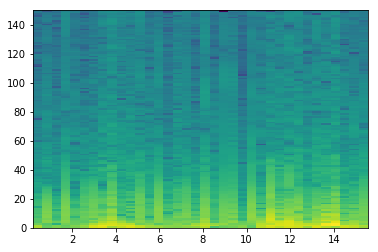

good List
[22]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


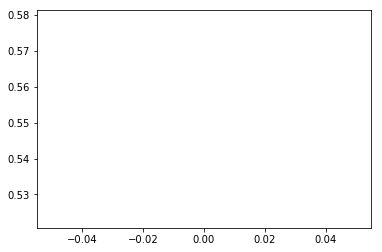

A02730
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32      ]


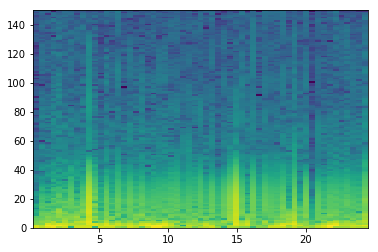

good List
[0, 11, 31, 38, 47]
[11, 20, 7, 9]
the temp 3
[[], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


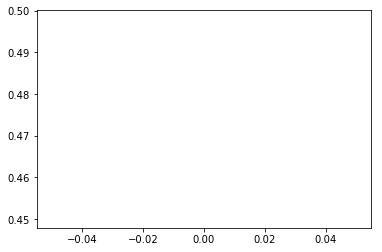

A02740
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24      ]


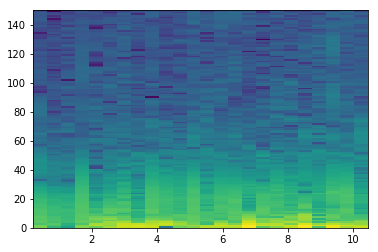

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


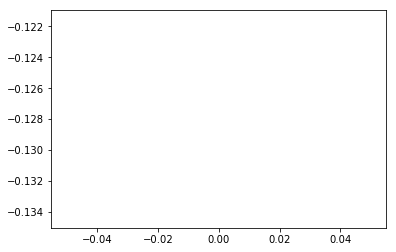

A02750
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


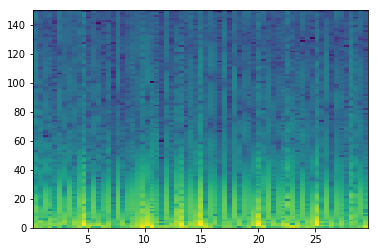

good List
[14, 16, 18, 26, 31, 38, 40, 50, 56, 61, 68]
[2, 2, 8, 5, 7, 2, 10, 6, 5, 7]
the temp 3
[[], [], [], [], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


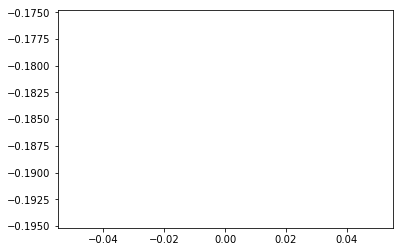

A02772
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


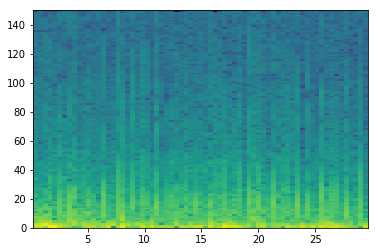

good List
[1, 2, 9, 12, 13, 15, 24, 26, 27, 32, 35, 40, 43, 47, 50, 53, 55, 57, 58, 60, 63, 65, 66, 68]
[1, 7, 3, 1, 2, 9, 2, 1, 5, 3, 5, 3, 4, 3, 3, 2, 2, 1, 2, 3, 2, 1, 2]
the temp 3
[[1], [], [4], [], [], [8], [], [], [], [], [], [], [], [], [18], [], [], [22]]
[1, 2]
longest
[1, 2]
indexList
[1, 2]
theMin
0
theMax
300


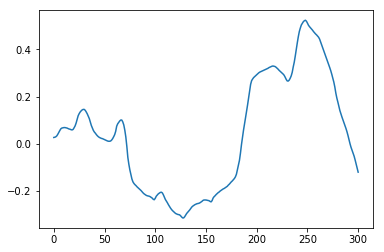

A02785
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


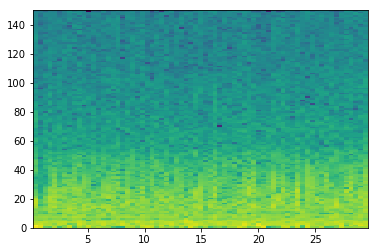

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


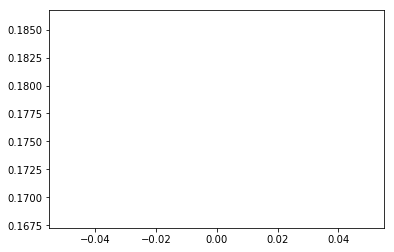

A02821
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


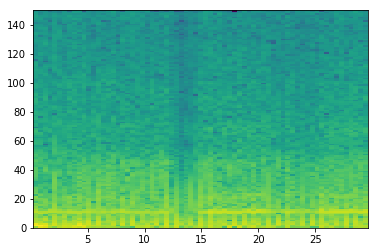

good List
[30]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


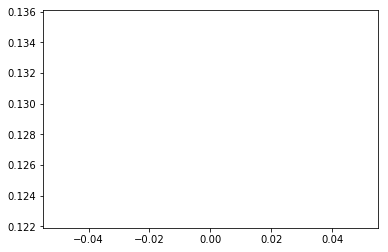

A02829
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


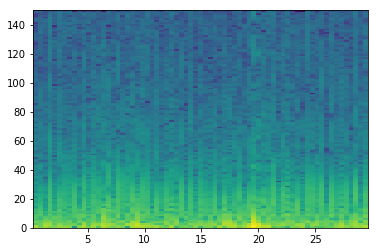

good List
[0, 1, 2, 4, 7, 9, 11, 13, 24, 26, 27, 29, 31, 33, 36, 38, 39, 43, 53, 55, 57, 58, 60, 62, 63, 64, 65, 67]
[1, 1, 2, 3, 2, 2, 2, 11, 2, 1, 2, 2, 2, 3, 2, 1, 4, 10, 2, 2, 1, 2, 2, 1, 1, 1, 2]
the temp 3
[[1, 2], [], [], [], [], [], [], [10], [], [], [], [], [16], [], [], [], [21], [], [24, 25, 26]]
[62, 63, 64, 65]
longest
[62, 63, 64, 65]
indexList
[62, 63, 64, 65]
theMin
7800
theMax
8400


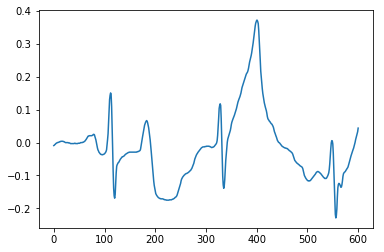

A02833
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


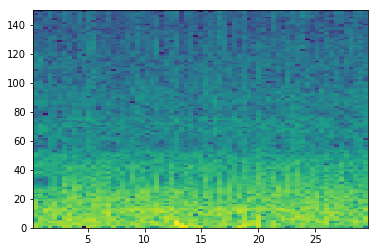

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


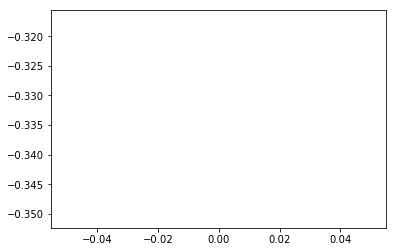

A02874
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

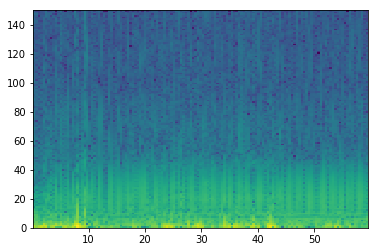

good List
[1, 2, 15, 30, 37, 39, 43, 52, 56, 76, 104, 105, 107, 108, 111, 112, 115, 117, 118, 125, 129, 130, 131, 133, 137, 138]
[1, 13, 15, 7, 2, 4, 9, 4, 20, 28, 1, 2, 1, 3, 1, 3, 2, 1, 7, 4, 1, 1, 2, 4, 1]
the temp 3
[[1], [], [], [], [], [], [], [], [], [11], [13], [15], [], [18], [], [21, 22], []]
[129, 130, 131]
longest
[129, 130, 131]
indexList
[129, 130, 131]
theMin
16500
theMax
16800


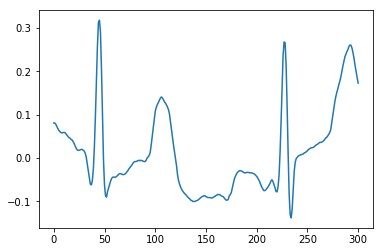

A02955
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


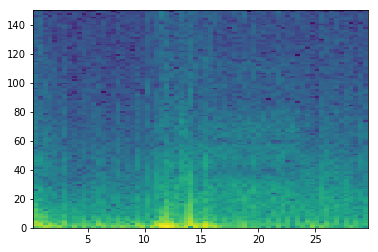

good List
[5, 7, 8, 9, 11, 12, 15, 16, 18, 19, 20]
[2, 1, 1, 2, 1, 3, 1, 2, 1, 1]
the temp 3
[[], [2, 3], [5], [7]]
[7, 8, 9]
longest
[7, 8, 9]
indexList
[7, 8, 9]
theMin
900
theMax
1200


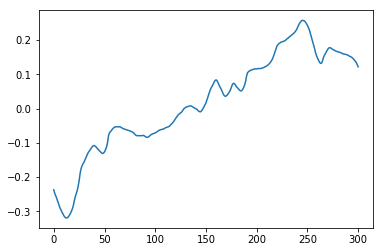

A02961
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333  8.96
  9.38666667  9.81333333]


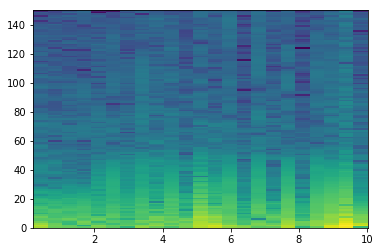

good List
[1, 2, 3, 4, 10, 14, 16, 18]
[1, 1, 1, 6, 4, 2, 2]
the temp 3
[[1, 2, 3], [], [], []]
[1, 2, 3, 4]
longest
[1, 2, 3, 4]
indexList
[1, 2, 3, 4]
theMin
0
theMax
600


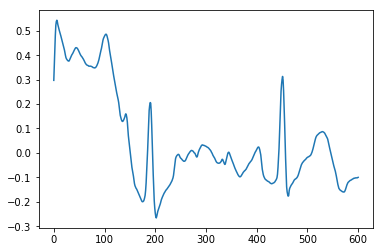

A02997
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

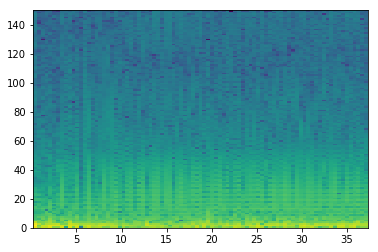

good List
[5, 12]
[7]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


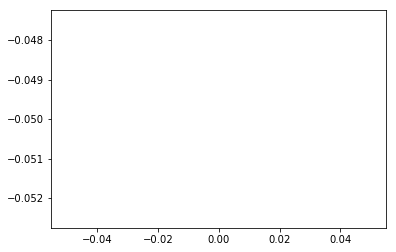

A03039
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32      ]


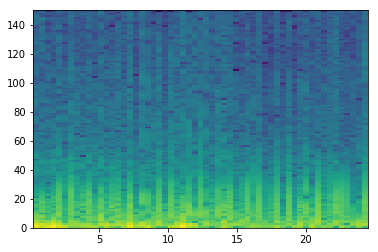

good List
[44, 54]
[10]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


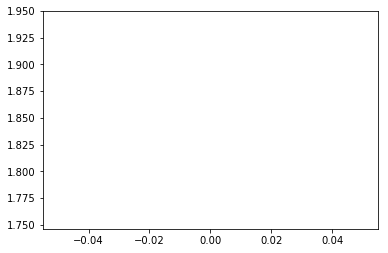

A03050
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333]


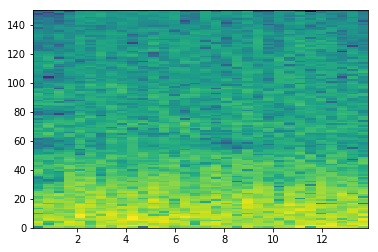

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


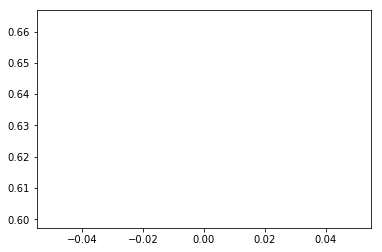

A03117
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


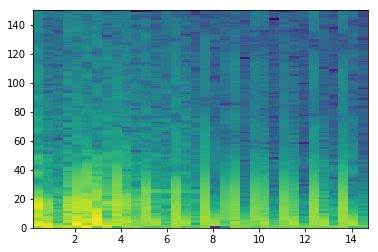

good List
[18, 19, 21, 24, 27, 29, 30, 33]
[1, 2, 3, 3, 2, 1, 3]
the temp 3
[[1], [], [], [], [6]]
[18, 19]
longest
[18, 19]
indexList
[18, 19]
theMin
2400
theMax
2700


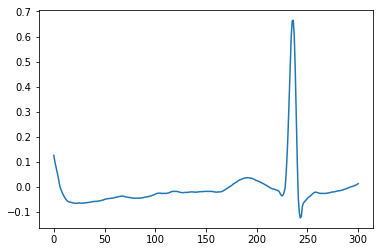

A03118
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


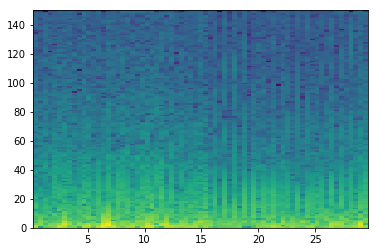

good List
[44]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


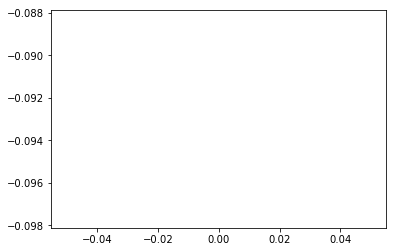

A03149
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


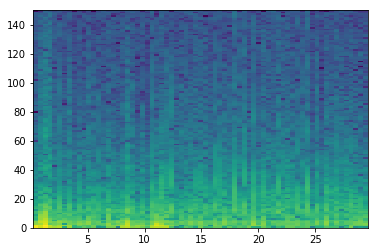

good List
[4, 6, 9, 12, 14, 21, 23, 36, 40, 44, 46, 55, 57, 59, 67]
[2, 3, 3, 2, 7, 2, 13, 4, 4, 2, 9, 2, 2, 8]
the temp 3
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


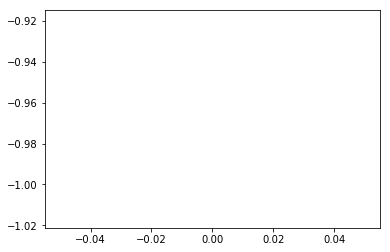

A03183
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


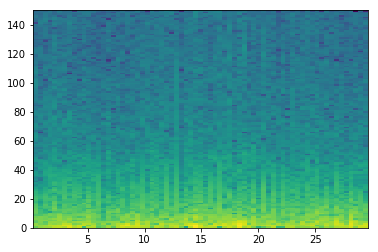

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


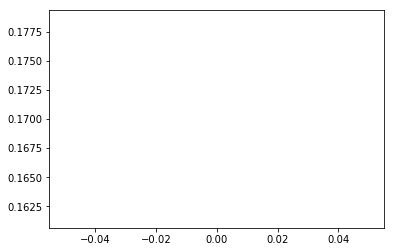

A03199
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


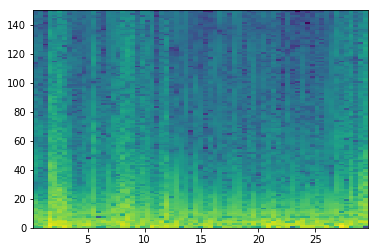

good List
[32, 43, 46]
[11, 3]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


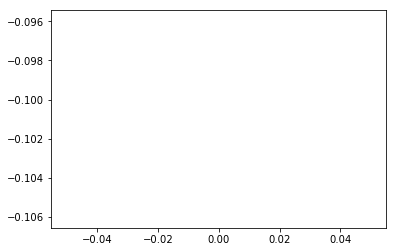

A03215
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


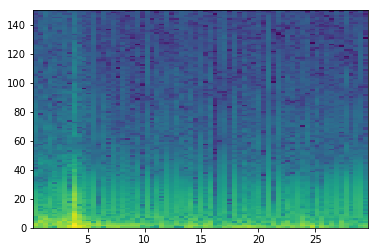

good List
[13, 15, 20, 22, 24, 26, 28, 30, 33, 35, 37, 38, 40, 42, 44, 45, 47, 49, 51, 52, 54, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68]
[2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
the temp 3
[[], [], [], [], [], [], [], [], [], [], [11], [], [], [15], [], [], [19], [], [22, 23, 24, 25, 26, 27]]
[57, 58, 59, 60, 61, 62, 63]
longest
[57, 58, 59, 60, 61, 62, 63]
indexList
[57, 58, 59, 60, 61, 62, 63]
theMin
7200
theMax
8100


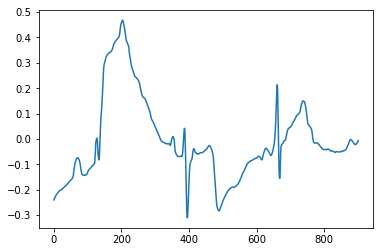

A03239
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


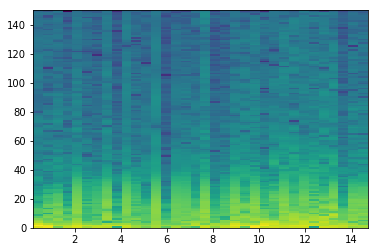

good List
[3, 6, 8, 10, 11, 13, 18, 23, 31]
[3, 2, 2, 1, 2, 5, 5, 8]
the temp 3
[[], [], [], [4], [], [], []]
[10, 11]
longest
[10, 11]
indexList
[10, 11]
theMin
1200
theMax
1500


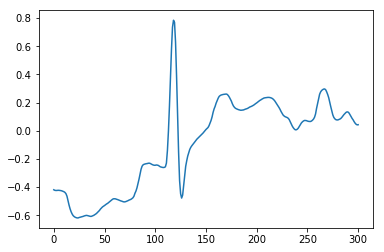

A03269
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


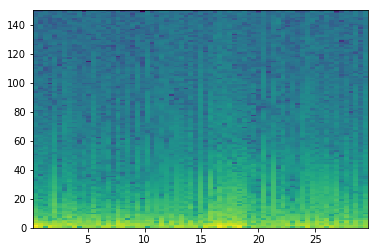

good List
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 44, 45, 46, 48, 50, 53, 54, 55, 58, 59, 61, 63, 65, 66, 67]
[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 9, 1, 1, 2, 2, 3, 1, 1, 3, 1, 2, 2, 2, 1, 1]
the temp 3
[[1, 2, 3], [5, 6, 7, 8, 9, 10], [12, 13, 14, 15, 16], [], [], [20, 21, 22, 23, 24, 25, 26], [], [], [30, 31], [], [], [35, 36], [38], [], []]
[24, 25, 26, 27, 28, 29, 30, 31]
longest
[24, 25, 26, 27, 28, 29, 30, 31]
indexList
[24, 25, 26, 27, 28, 29, 30, 31]
theMin
3000
theMax
3900


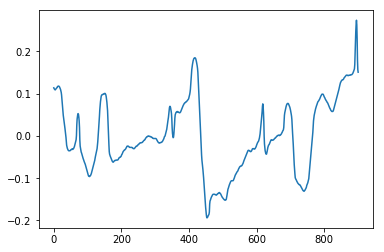

A03352
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08      ]


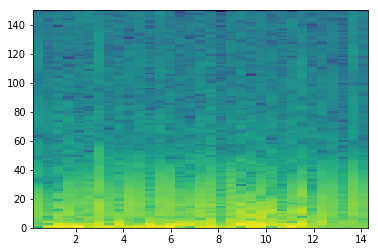

good List
[1, 18]
[17]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


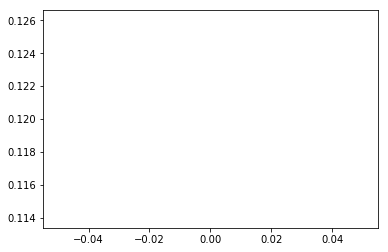

A03363
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08      ]


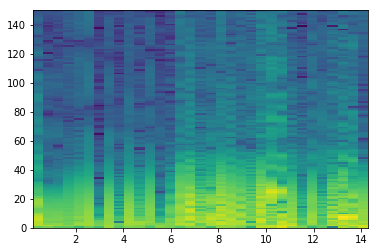

good List
[1, 2, 3, 4, 6, 8, 10, 12]
[1, 1, 1, 2, 2, 2, 2]
the temp 3
[[1, 2, 3], [], [], []]
[1, 2, 3, 4]
longest
[1, 2, 3, 4]
indexList
[1, 2, 3, 4]
theMin
0
theMax
600


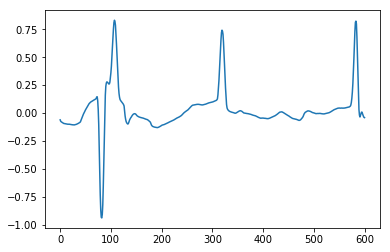

A03408
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333]


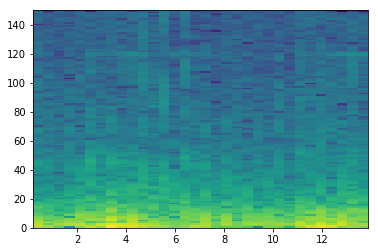

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


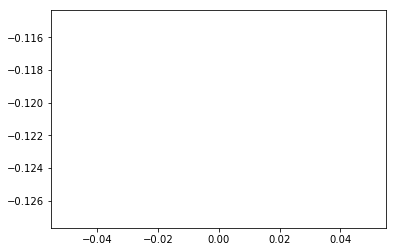

A03443
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52      ]


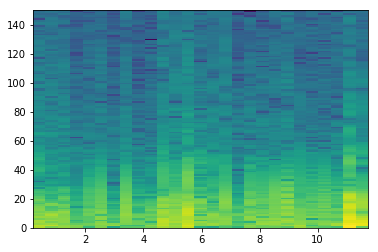

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


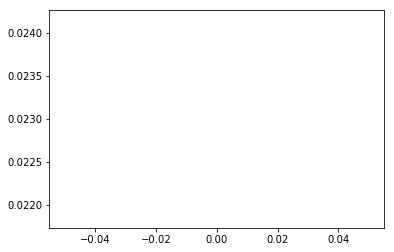

A03489
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


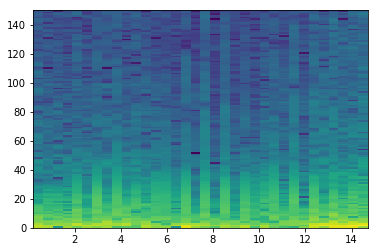

good List
[16, 18]
[2]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


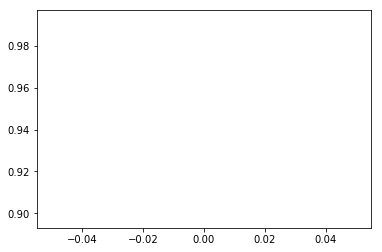

A03541
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667]


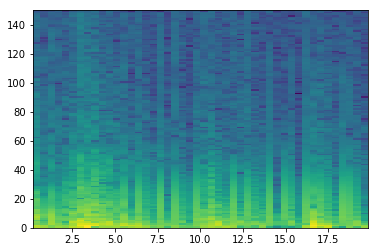

good List
[13, 18, 20, 21, 22, 26, 27, 28, 30, 31, 33, 36, 41, 44, 45]
[5, 2, 1, 1, 4, 1, 1, 2, 1, 2, 3, 5, 3, 1]
the temp 3
[[], [], [3, 4], [6, 7], [9], [], [], []]
[20, 21, 22]
longest
[20, 21, 22]
indexList
[20, 21, 22]
theMin
2400
theMax
2700


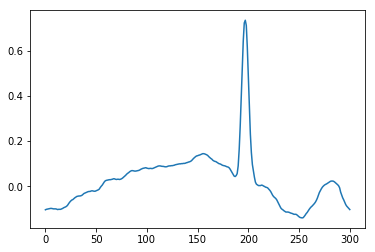

A03549
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333  8.96
  9.38666667]


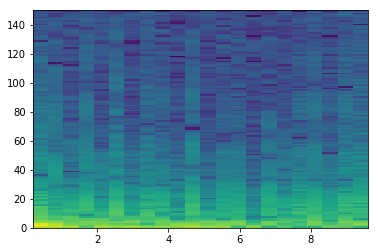

good List
[1, 2, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19]
[1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2]
the temp 3
[[1], [], [], [5], [7, 8, 9, 10, 11, 12]]
[11, 12, 13, 14, 15, 16, 17]
longest
[11, 12, 13, 14, 15, 16, 17]
indexList
[11, 12, 13, 14, 15, 16, 17]
theMin
1500
theMax
2100


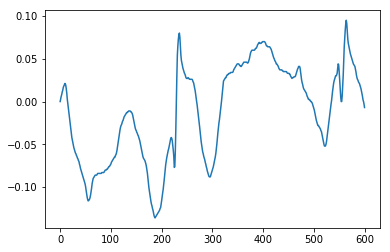

A03565
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333  8.96
  9.38666667  9.81333333]


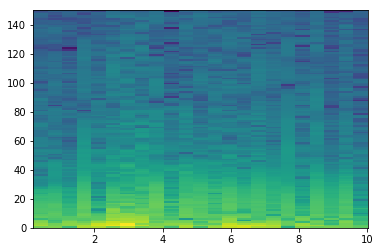

good List
[2, 20]
[18]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


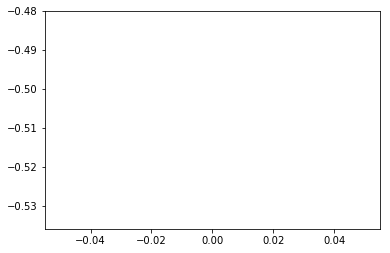

A03580
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32      ]


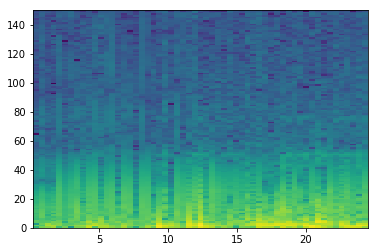

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


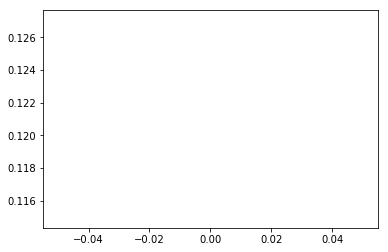

A03596
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36      ]


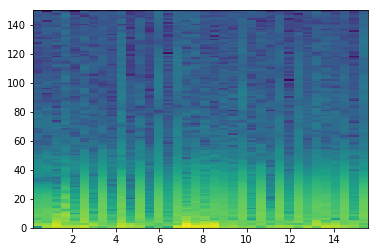

good List
[14, 27]
[13]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


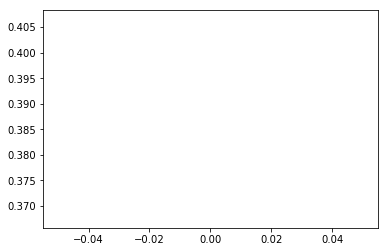

A03685
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

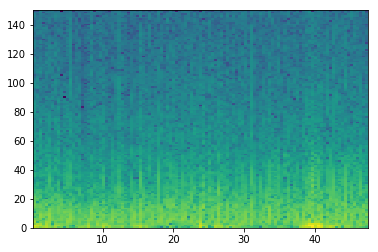

good List
[9, 21, 74]
[12, 53]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


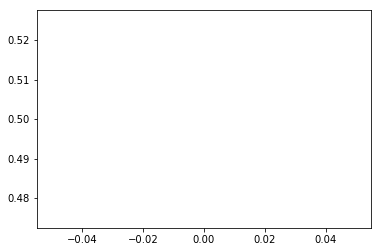

A03719
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


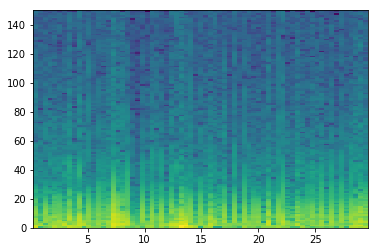

good List
[12, 20, 21, 23, 27, 33, 40, 42, 45, 47, 49, 53, 62]
[8, 1, 2, 4, 6, 7, 2, 3, 2, 2, 4, 9]
the temp 3
[[], [2], [], [], [], [], [], [], [], [], []]
[20, 21]
longest
[20, 21]
indexList
[20, 21]
theMin
2400
theMax
2700


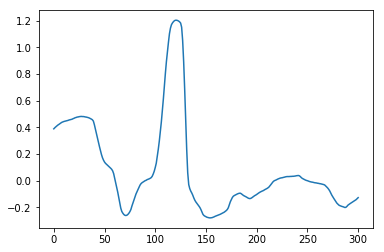

A03738
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


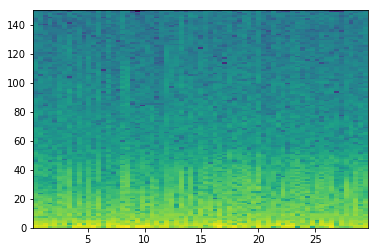

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


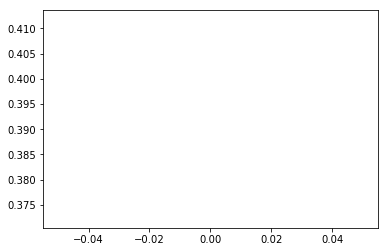

A03739
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

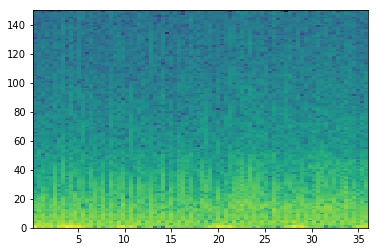

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


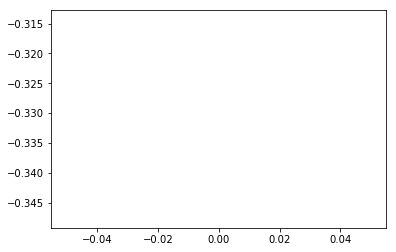

A03745
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


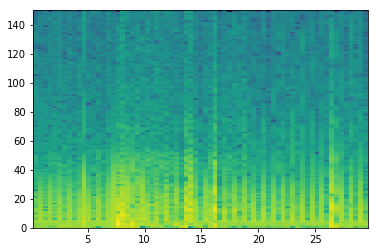

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


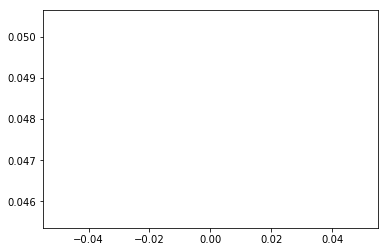

A03814
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


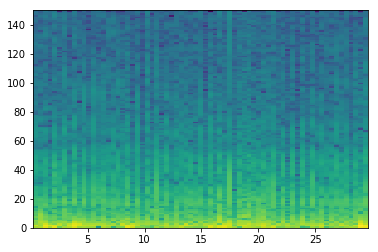

good List
[22, 35, 52, 54, 65]
[13, 17, 2, 11]
the temp 3
[[], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


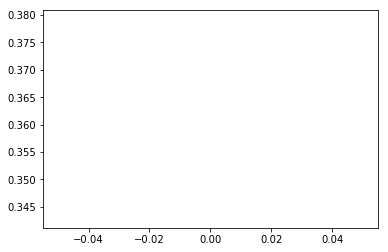

A03829
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


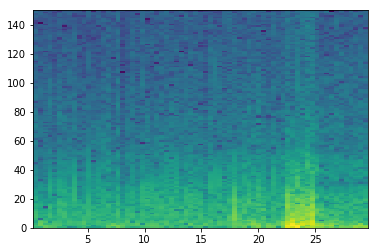

good List
[4, 18]
[14]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


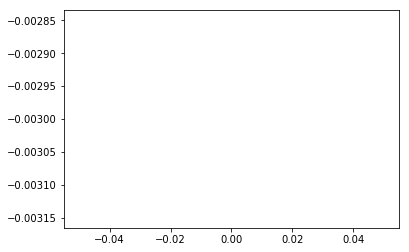

A03848
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2       ]


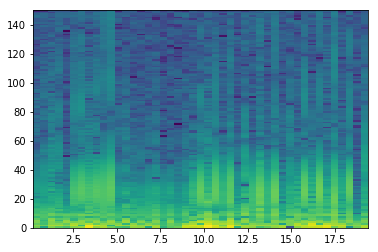

good List
[0, 1, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 27, 29, 31, 33, 34, 35, 36, 37, 39, 41, 42, 43]
[1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1]
the temp 3
[[1], [3], [5, 6], [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [], [], [], [], [24, 25, 26, 27], []]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
longest
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
indexList
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
theMin
1500
theMax
2700


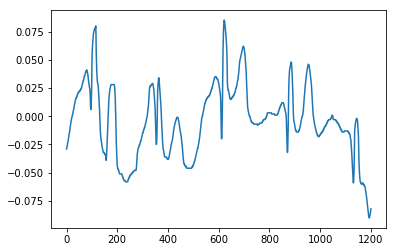

A03934
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24      ]


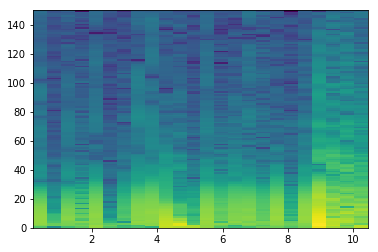

good List
[1, 2, 3, 4, 5, 6, 11, 16, 18]
[1, 1, 1, 1, 1, 5, 5, 2]
the temp 3
[[1, 2, 3, 4, 5], [], []]
[1, 2, 3, 4, 5, 6]
longest
[1, 2, 3, 4, 5, 6]
indexList
[1, 2, 3, 4, 5, 6]
theMin
0
theMax
600


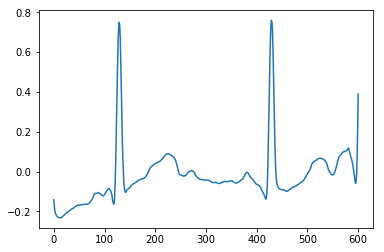

A03946
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333]


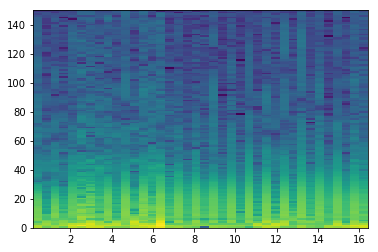

good List
[1, 17, 19, 21, 23, 25, 33, 35]
[16, 2, 2, 2, 2, 8, 2]
the temp 3
[[], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


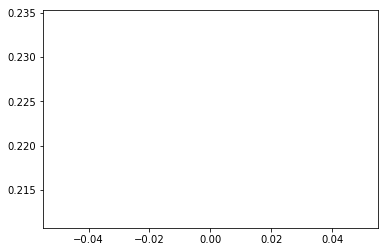

A04020
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


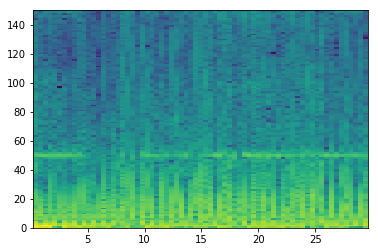

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


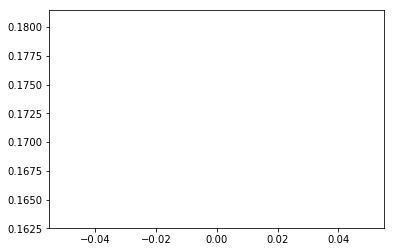

A04086
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333]


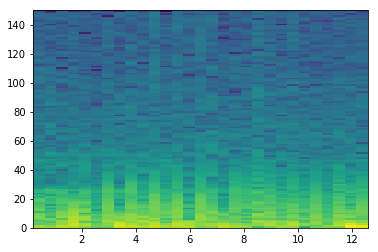

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


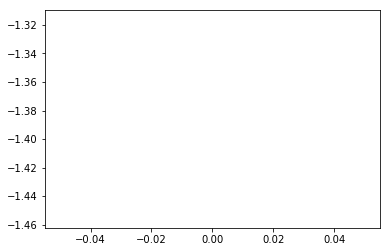

A04133
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


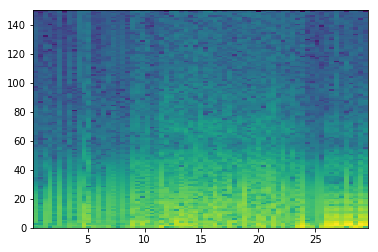

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


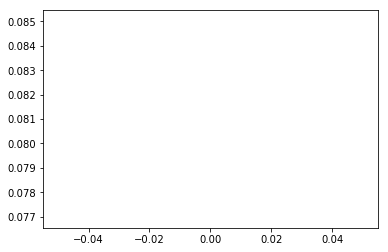

A04137
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667]


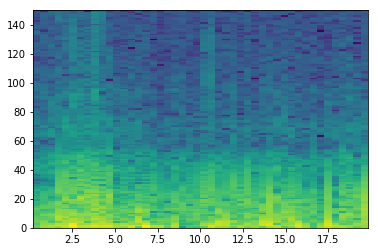

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


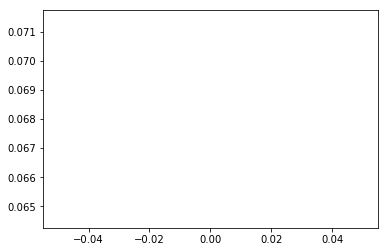

A04170
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


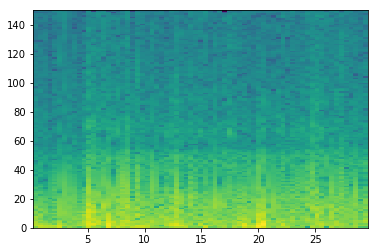

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


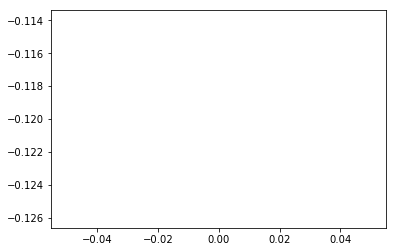

A04186
[ 0.42666667  0.85333333  1.28        1.70666667  2.13333333
  2.56        2.98666667  3.41333333  3.84        4.26666667
  4.69333333  5.12        5.54666667  5.97333333  6.4         6.82666667
  7.25333333  7.68        8.10666667  8.53333333  8.96
  9.38666667  9.81333333]


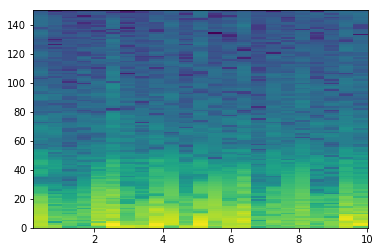

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


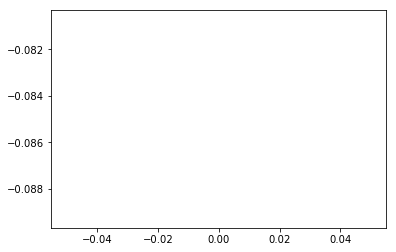

A04216
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52      ]


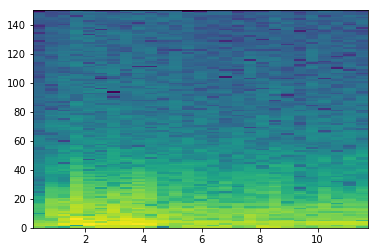

good List
[0]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


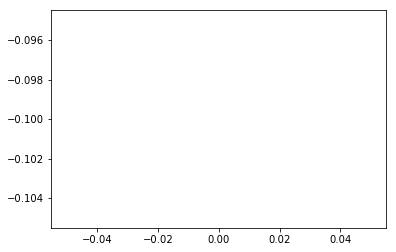

A04231
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


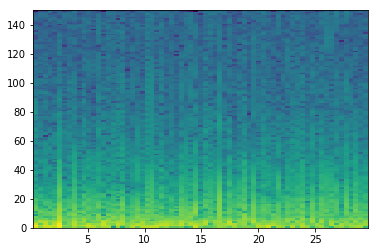

good List
[1, 4, 6, 7, 20, 27, 28, 29, 32, 34, 39, 41, 44, 46, 48, 51, 56, 58, 60, 61, 67, 68]
[3, 2, 1, 13, 7, 1, 1, 3, 2, 5, 2, 3, 2, 2, 3, 5, 2, 2, 1, 6, 1]
the temp 3
[[], [], [3], [], [6, 7], [], [], [], [], [], [], [], [], [], [], [19]]
[27, 28, 29]
longest
[27, 28, 29]
indexList
[27, 28, 29]
theMin
3300
theMax
3600


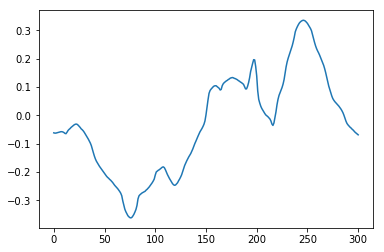

A04244
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667]


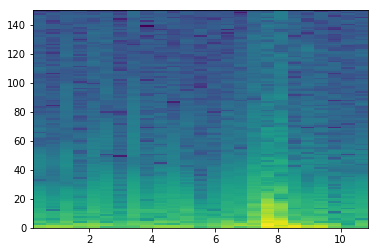

good List
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1]
the temp 3
[[], [], [3]]
[5, 6]
longest
[5, 6]
indexList
[5, 6]
theMin
600
theMax
900


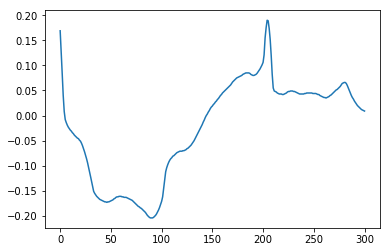

A04251
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


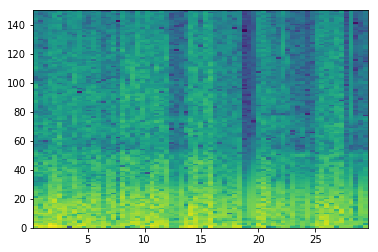

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


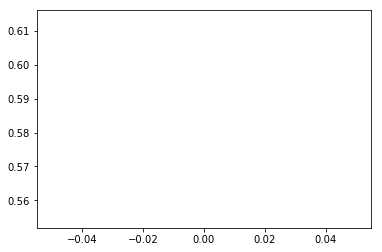

A04257
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92      ]


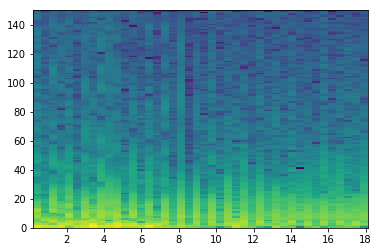

good List
[15, 17, 19, 23, 27, 33]
[2, 2, 4, 4, 6]
the temp 3
[[], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


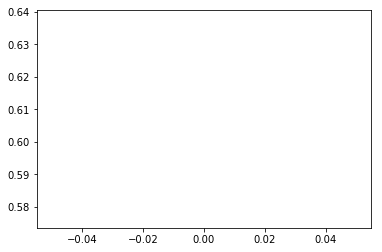

A04282
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

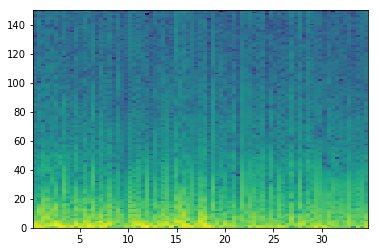

good List
[22, 42, 49, 70]
[20, 7, 21]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


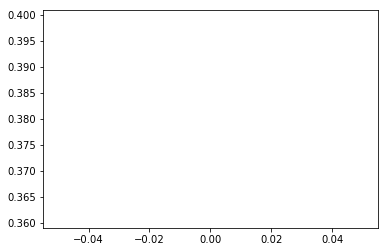

A04303
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52      ]


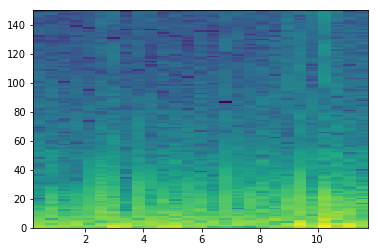

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


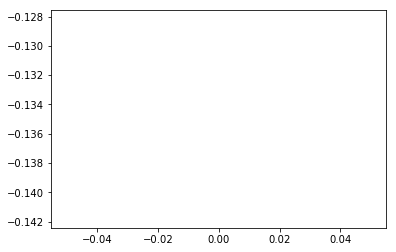

A04325
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333]


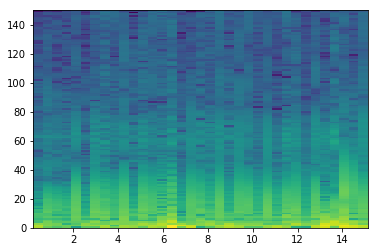

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


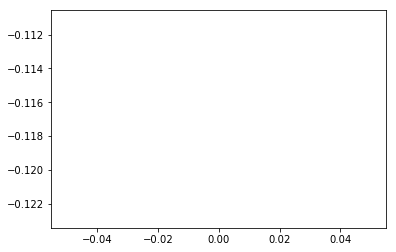

A04329
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333]


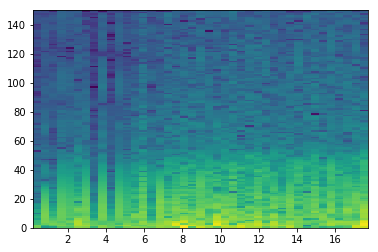

good List
[0, 2, 7, 9]
[2, 5, 2]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


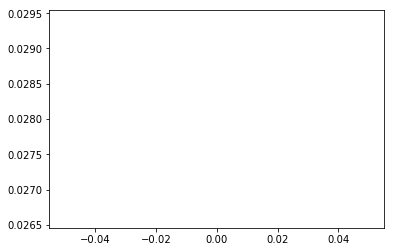

A04366
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


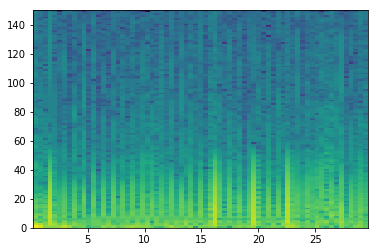

good List
[5, 7, 9, 11, 13, 14, 15, 17, 18, 19, 21, 29, 33, 35, 39, 43, 47, 49, 51, 55, 64, 66]
[2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 8, 4, 2, 4, 4, 4, 2, 2, 4, 9, 2]
the temp 3
[[], [], [], [], [5, 6], [8, 9], [], [], [], [], [], [], [], [], [], [], []]
[13, 14, 15]
longest
[13, 14, 15]
indexList
[13, 14, 15]
theMin
1500
theMax
1800


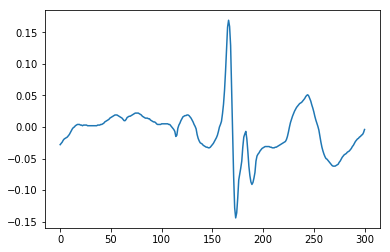

A04424
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667]


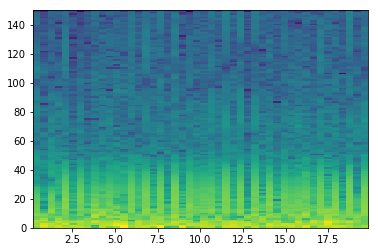

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


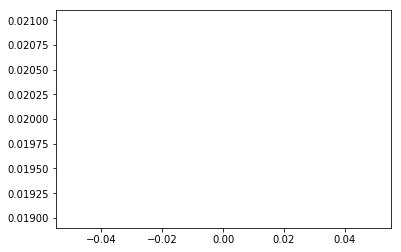

A04452
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44        29.86666667
  30.29333333  30.72        31.14666667  31.57333333  32.
  32.42666667  32.85333333  33.28      

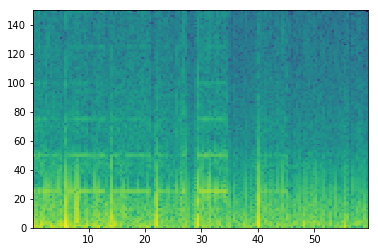

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


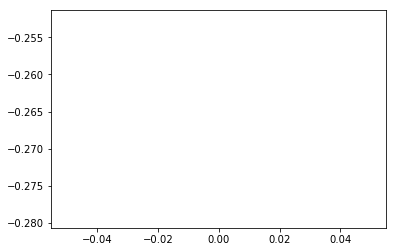

A04503
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


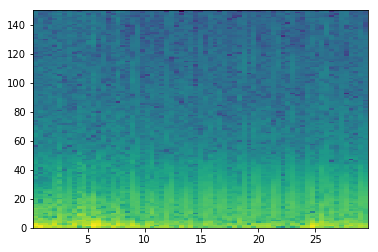

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


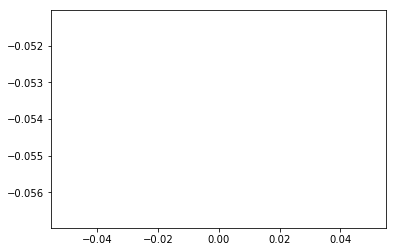

A04513
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52      ]


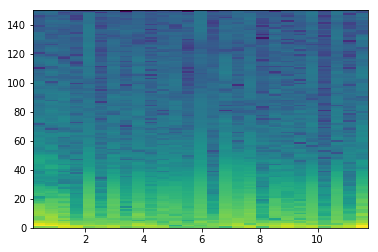

good List
[14, 23]
[9]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


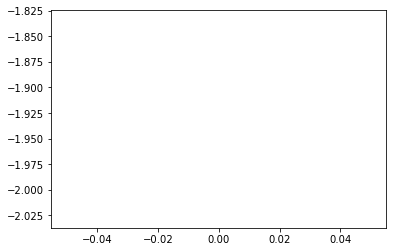

A04522
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


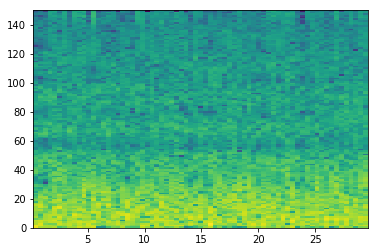

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


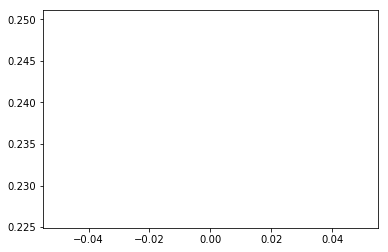

A04555
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


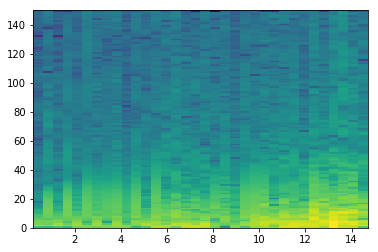

good List
[0, 2, 4, 5, 6, 7, 9, 18, 20]
[2, 2, 1, 1, 1, 2, 9, 2]
the temp 3
[[], [], [3, 4, 5], [], []]
[4, 5, 6, 7]
longest
[4, 5, 6, 7]
indexList
[4, 5, 6, 7]
theMin
600
theMax
900


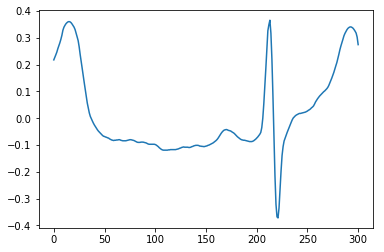

A04644
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667]


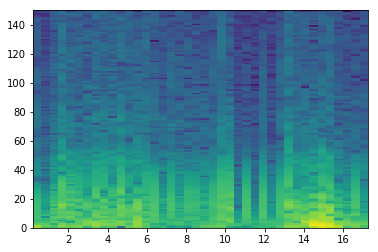

good List
[1, 24, 26, 28]
[23, 2, 2]
the temp 3
[[], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


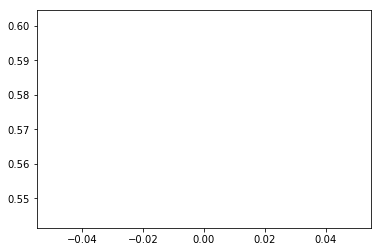

A04673
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


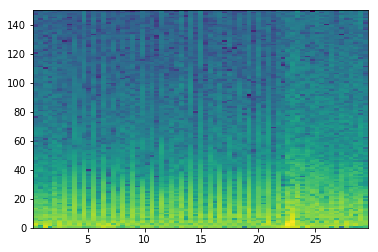

good List
[33, 45, 49]
[12, 4]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


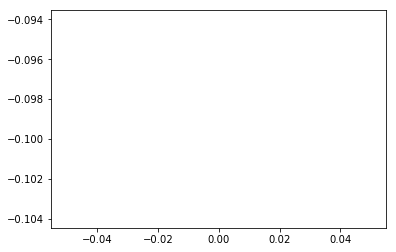

A04675
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


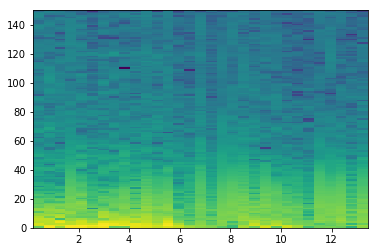

good List
[25]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


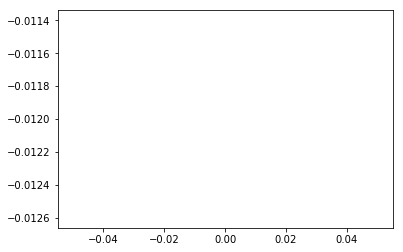

A04676
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


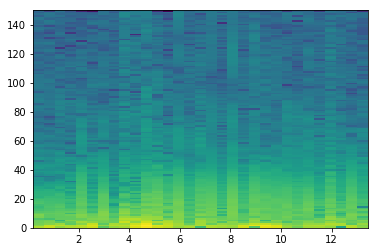

good List
[1, 3, 7]
[2, 4]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


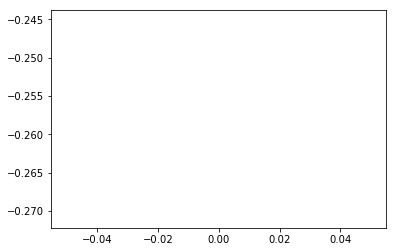

A04685
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667]


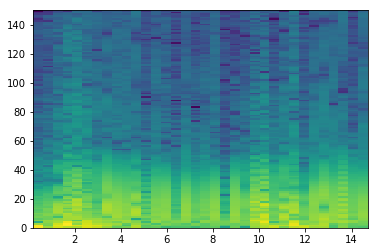

good List
[0, 16, 19]
[16, 3]
the temp 3
[[], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


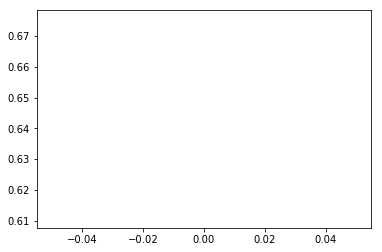

A04701
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333]


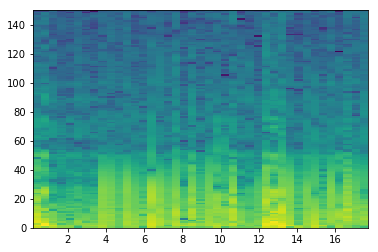

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


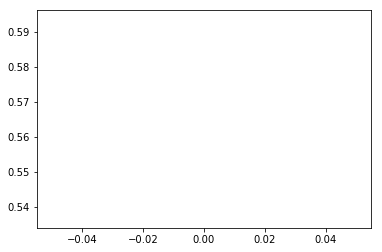

A04707
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


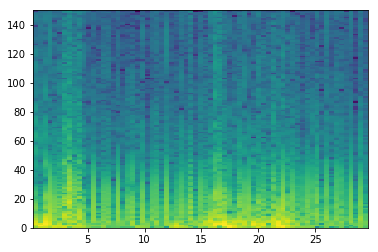

good List
[13, 16, 18, 23, 33, 55, 59, 66]
[3, 2, 5, 10, 22, 4, 7]
the temp 3
[[], [], [], [], [], [], []]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


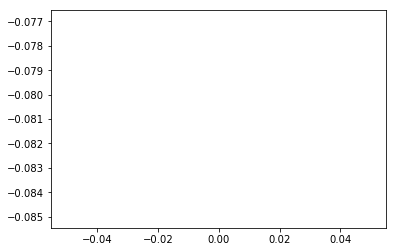

A04735
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


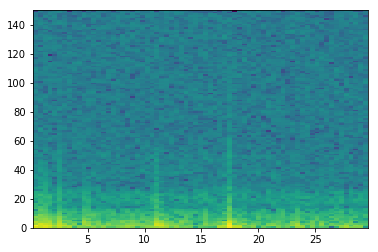

good List
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


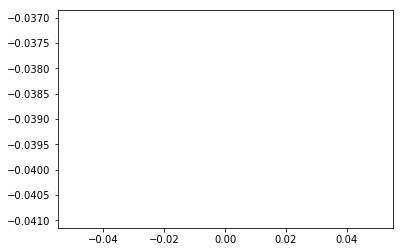

A04756
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


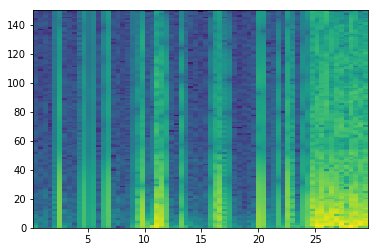

good List
[0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 13, 16, 17, 18, 19, 20, 23, 24, 28, 29, 31, 32, 33, 34, 35, 41, 42, 43, 44, 45, 48, 49, 51, 54]
[1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 4, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 3, 1, 2, 3]
the temp 3
[[1, 2, 3, 4], [6, 7, 8], [], [], [12, 13, 14, 15], [17], [19], [21, 22, 23, 24], [26, 27, 28, 29], [31], []]
[0, 1, 2, 3, 4]
longest
[0, 1, 2, 3, 4]
indexList
[0, 1, 2, 3, 4]
theMin
0
theMax
600


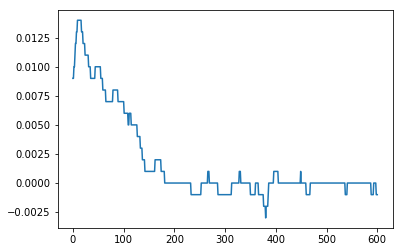

A04805
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667
  23.89333333  24.32        24.74666667  25.17333333  25.6
  26.02666667  26.45333333  26.88        27.30666667  27.73333333
  28.16        28.58666667  29.01333333  29.44      ]


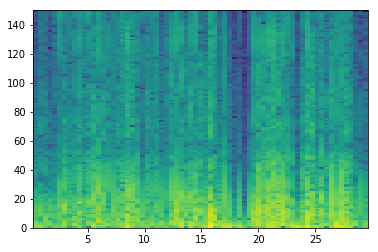

good List
[43]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


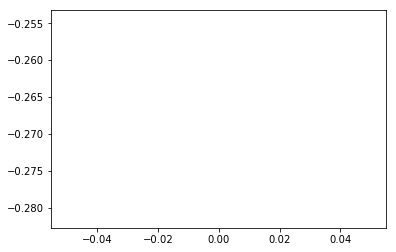

A04812
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08      ]


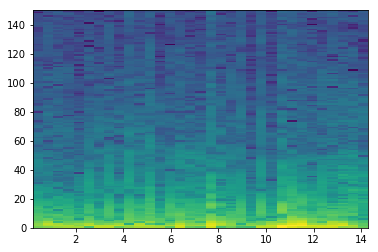

good List
[4, 21]
[17]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


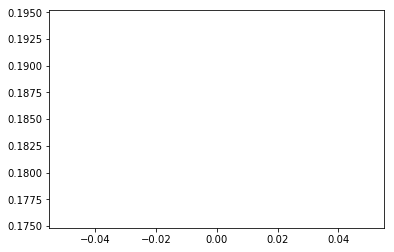

A04819
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333]


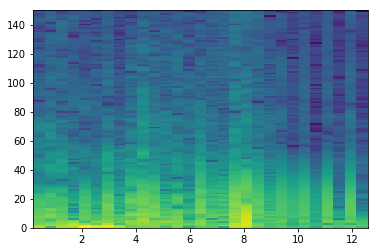

good List
[22, 23, 24, 26, 28]
[1, 1, 2, 2]
the temp 3
[[1, 2], []]
[22, 23, 24]
longest
[22, 23, 24]
indexList
[22, 23, 24]
theMin
2700
theMax
3000


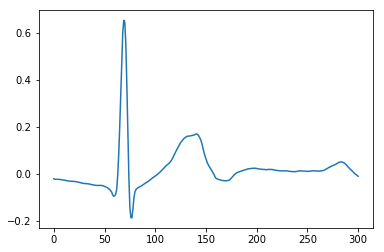

A04853
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2
  19.62666667  20.05333333  20.48        20.90666667  21.33333333
  21.76        22.18666667  22.61333333  23.04        23.46666667]


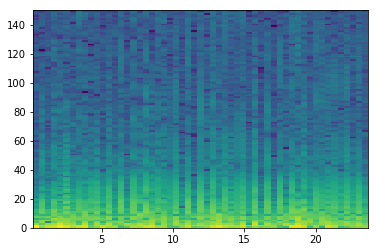

good List
[0, 2, 4, 6, 7, 8, 9, 11, 13, 14, 15, 17, 19, 21, 22, 24, 25, 26, 28, 30, 32, 33, 35, 37, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 54]
[2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2]
the temp 3
[[], [], [], [4, 5, 6], [], [9, 10], [], [], [14], [16, 17], [], [], [21], [], [], [25, 26], [], [29, 30, 31, 32, 33], []]
[45, 46, 47, 48, 49, 50]
longest
[45, 46, 47, 48, 49, 50]
indexList
[45, 46, 47, 48, 49, 50]
theMin
5700
theMax
6300


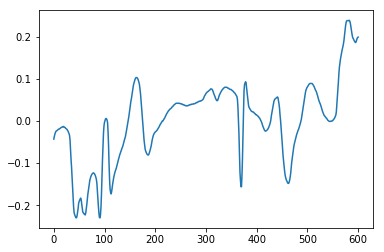

A04873
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08      ]


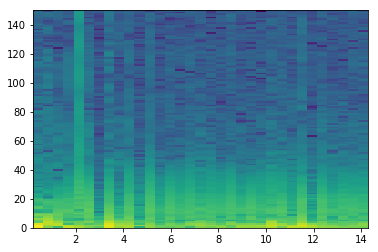

good List
[3, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32]
[3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1]
the temp 3
[[], [2, 3, 4, 5], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
longest
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
indexList
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
theMin
1500
theMax
2700


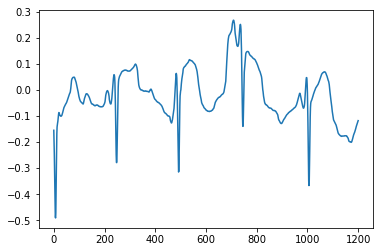

A04890
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667]


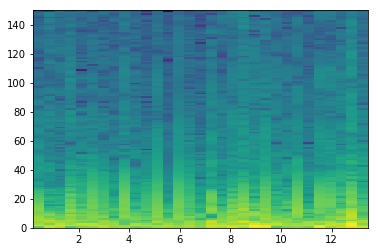

good List
[2, 12]
[10]
the temp 3
[[]]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


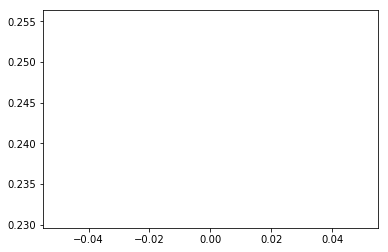

A04899
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333  14.08        14.50666667  14.93333333
  15.36        15.78666667  16.21333333  16.64        17.06666667
  17.49333333  17.92        18.34666667  18.77333333  19.2       ]


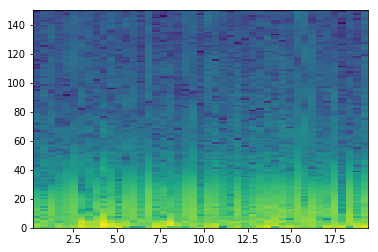

good List
[]
[]
the temp 3
[]
[]
longest
[]
indexList
[]
theMin
0
theMax
0


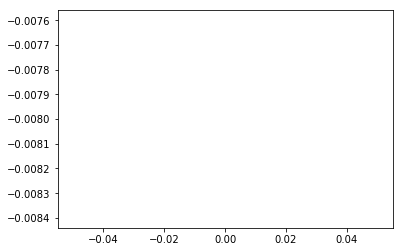

A04913
[  0.42666667   0.85333333   1.28         1.70666667   2.13333333
   2.56         2.98666667   3.41333333   3.84         4.26666667
   4.69333333   5.12         5.54666667   5.97333333   6.4
   6.82666667   7.25333333   7.68         8.10666667   8.53333333
   8.96         9.38666667   9.81333333  10.24        10.66666667
  11.09333333  11.52        11.94666667  12.37333333  12.8
  13.22666667  13.65333333]


In [ ]:
theCSV = open("200_set_of_Norm_AF_Rand.csv")
lineSkip = 0
for line in theCSV:
            #remove whitespace
    line = line.strip()
            #split up based off commas
    a,b,c,d = line.split(",")
            #if not at first line
    if(lineSkip != 0):
                #create plot diagram with ID at that line
        theStart(d)
    lineSkip += 1
#theStart("A00033")